<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Credit_Scoring_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

### **1. Carga Inicial de Librerías**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### **2. Entendimiento y Analisis Exploratorio de datos**

In [2]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [3]:
df_clase.shape

(31944, 31)

In [4]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [5]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [6]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [7]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [8]:
df_clase=df_clase.drop_duplicates()
df_clase.reset_index()
df_clase.shape

(31944, 31)

In [9]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [10]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

,count
FLG_DEFAULT_12M,
0,29920
1,2024


# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


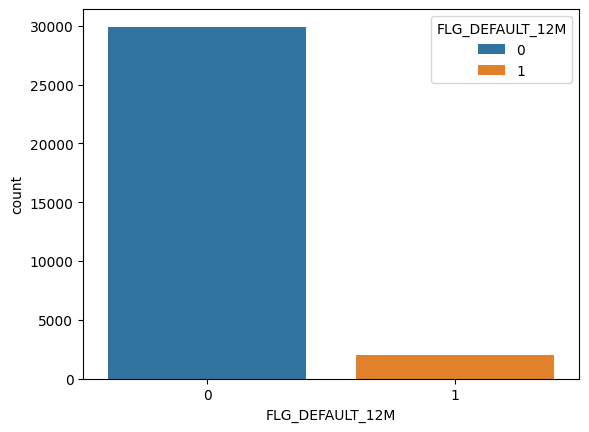

In [11]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M", hue="FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

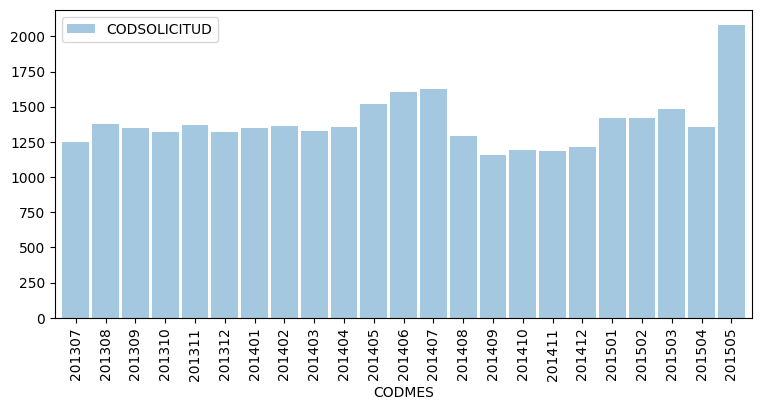

In [12]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

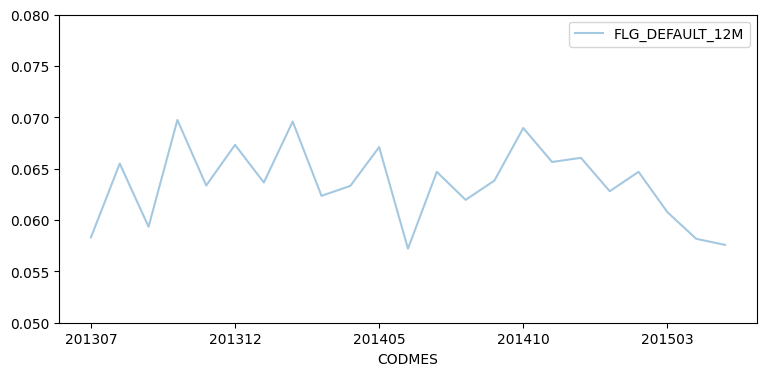

In [13]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

### ***Hagamos el Análisis Univariado***

Revisemos la cantidad de nulos y sus proporciones por variable

In [14]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
CODMES,0,0.000000
CODSOLICITUD,0,0.000000
DEUDA,0,0.000000
PLAZO_CREDITO,0,0.000000
FLG_GARANTIA,0,0.000000
MIN_MES_DE_DEFAULT,0,0.000000
FLG_DEFAULT_12M,0,0.000000
SEGMENTOCLIENTE,0,0.000000
TARJETA_RELACIONADA,0,0.000000
VEHICULAR_RELACIONADA,0,0.000000


Revisemos sus estadísticos básicos

In [15]:
df_clase.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ATRASO_MAXIMO_ULT_6M,31944.0,0.254070,3.028339,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,31941.0,1.074168,38.857057,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,31937.0,2.107931,47.275929,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,31266.0,5.157935,1.449751,1.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,31942.0,7161.642671,8621.384272,0.000000,1703.222083,4325.187267,9396.200433,8.185772e+05
DEUDA_TOTAL_SISTEMA,28763.0,24409.216018,58799.081039,0.000000,1505.645000,6745.890000,20973.860000,1.458561e+06
NUMERO_DE_PAGOS_PDH,31944.0,16.291948,9.419303,0.000000,7.000000,24.000000,24.000000,2.400000e+01


In [16]:
df_clase.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
CODMES,31944,23,201505,2084
CODSOLICITUD,31944,31944,1,1
FLG_GARANTIA,31944,2,0,30605
MIN_MES_DE_DEFAULT,31944,37,nan,28495
SEGMENTOCLIENTE,31944,7,CLIENTES ORO,22101
TARJETA_RELACIONADA,31944,2,1,19914
VEHICULAR_RELACIONADA,31944,2,0,31612
HIPOTECARIO_RELACIONADA,31944,2,0,31212
CLASIF_SISTEMA_ULT_12M,31944,6,0.0,23640
FLG_PDH,31944,2,1,26825


Revisemos como se distribuye cada variable

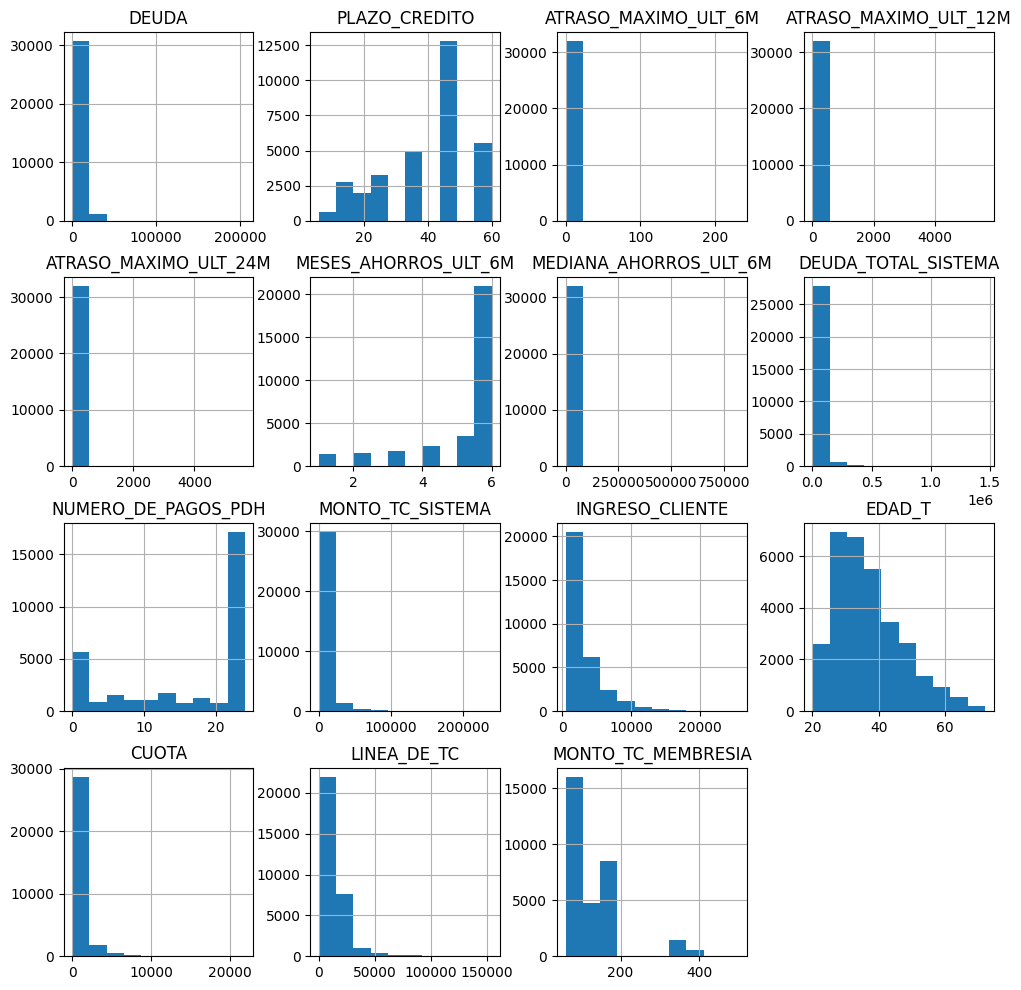

In [17]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).hist(figsize = (12, 12))
plt.show()

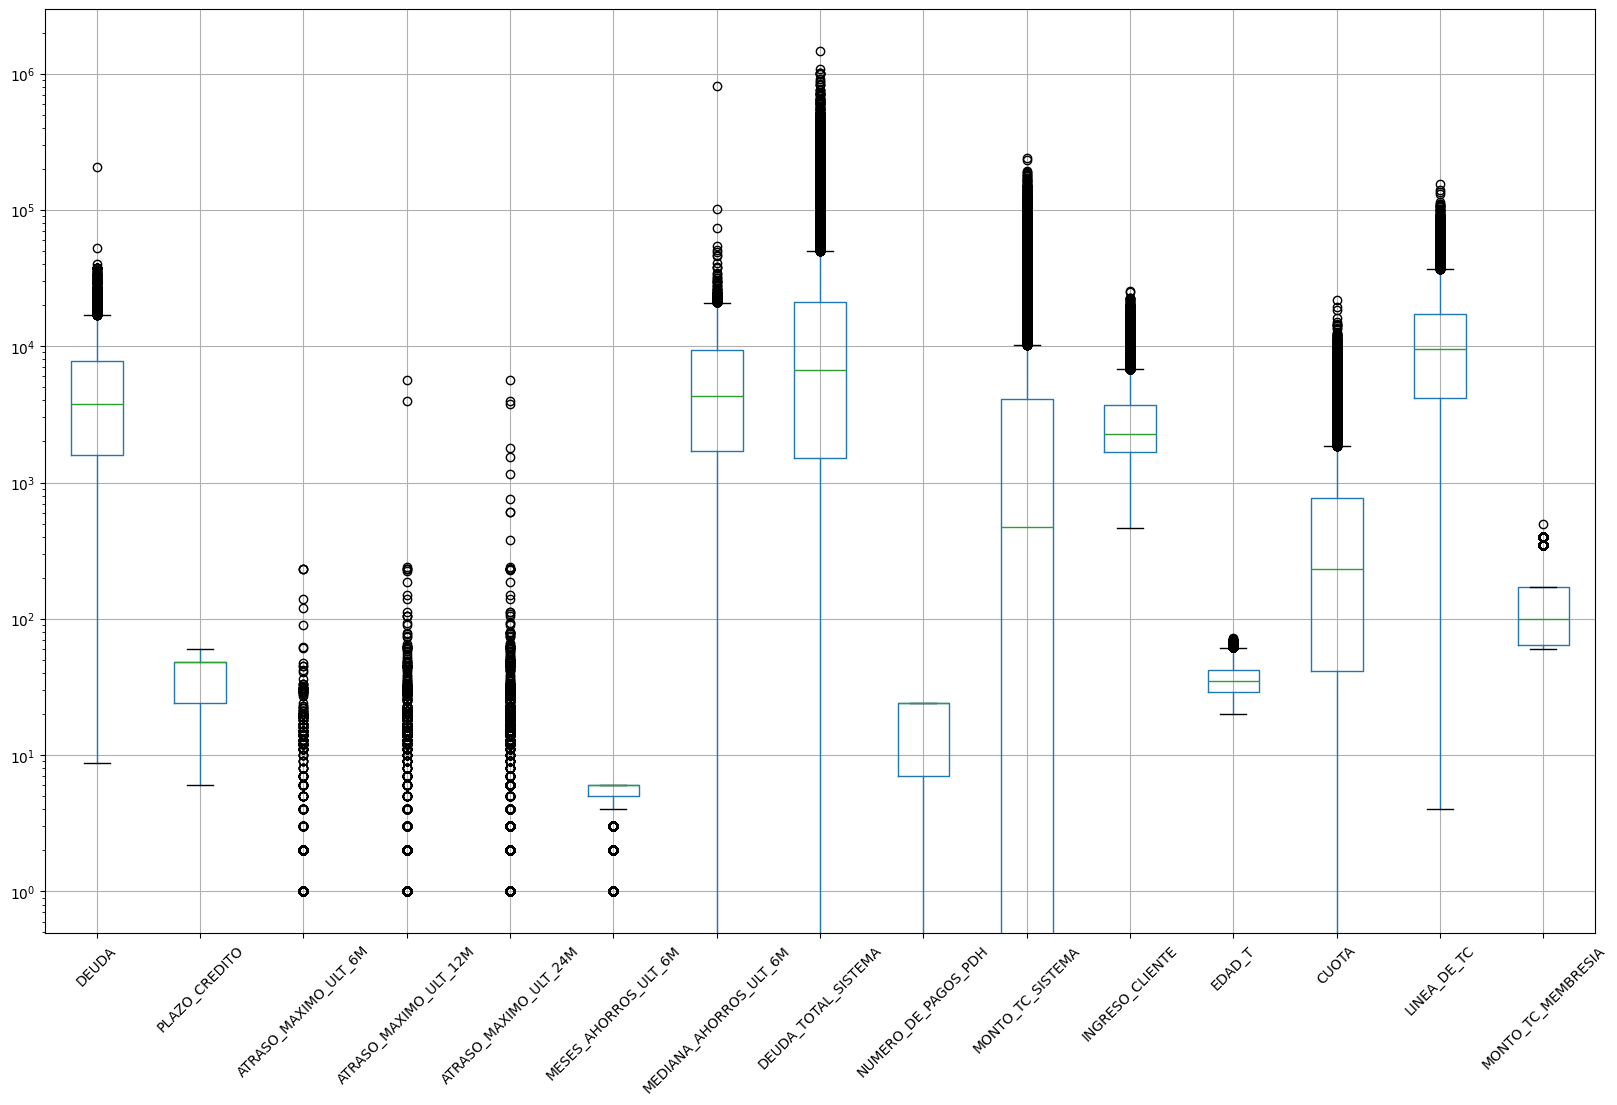

In [18]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [19]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))

In [20]:
outliers_col(df_clase)

DEUDA | 0 | 2126
PLAZO_CREDITO | 0 | 0
FLG_DEFAULT_12M | 0 | 2024
ATRASO_MAXIMO_ULT_6M | 0 | 2005
ATRASO_MAXIMO_ULT_12M | 0 | 4154
ATRASO_MAXIMO_ULT_24M | 0 | 6634
MESES_AHORROS_ULT_6M | 4635 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 3318
DEUDA_TOTAL_SISTEMA | 0 | 1880
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 4470
INGRESO_CLIENTE | 0 | 2512
EDAD_T | 0 | 350
CUOTA | 0 | 2867
LINEA_DE_TC | 0 | 1200
MONTO_TC_MEMBRESIA | 0 | 2015


# **3. Feature Engineering**

#### 3.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [21]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [22]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 7.5 MB/s eta 0:00:00


### Partición Train y test (considerando estratificación de la Y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [24]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06337209302325582

In [25]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.0633347245409015

In [26]:
# Revisión de la proporción de nulos por variable
X_train.isnull().mean().where(X_train.isnull().mean()>0)

,0
CODMES,NaN
CODSOLICITUD,NaN
DEUDA,NaN
PLAZO_CREDITO,NaN
FLG_GARANTIA,NaN
MIN_MES_DE_DEFAULT,NaN
SEGMENTOCLIENTE,NaN
TARJETA_RELACIONADA,NaN
VEHICULAR_RELACIONADA,NaN
HIPOTECARIO_RELACIONADA,NaN


### Variable numéricas

In [27]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

,0
DEUDA,NaN
PLAZO_CREDITO,NaN
ATRASO_MAXIMO_ULT_6M,NaN
ATRASO_MAXIMO_ULT_12M,0.000045
ATRASO_MAXIMO_ULT_24M,0.000179
MESES_AHORROS_ULT_6M,0.020081
MEDIANA_AHORROS_ULT_6M,0.000089
DEUDA_TOTAL_SISTEMA,0.100134
NUMERO_DE_PAGOS_PDH,NaN
MONTO_TC_SISTEMA,NaN


### Variables categóricas

In [28]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.isnull().mean().where(var_cat.isnull().mean()>0)

,0
CODMES,NaN
CODSOLICITUD,NaN
FLG_GARANTIA,NaN
MIN_MES_DE_DEFAULT,NaN
SEGMENTOCLIENTE,NaN
TARJETA_RELACIONADA,NaN
VEHICULAR_RELACIONADA,NaN
HIPOTECARIO_RELACIONADA,NaN
CLASIF_SISTEMA_ULT_12M,NaN
FLG_PDH,NaN


### Generamos un pipeline para tratamiento de Nulos

In [29]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

In [30]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación en uno solo
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
    ]
)

In [31]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL']))])

In [32]:
pipe_2.named_steps["median_imputer"].imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [33]:
pipe_2.named_steps["arbitrary_imputer"].imputer_dict_

{'CUOTA': 0,
 'DEUDA_TOTAL_SISTEMA': 0,
 'MEDIANA_AHORROS_ULT_6M': 0,
 'MESES_AHORROS_ULT_6M': 0,
 'ATRASO_MAXIMO_ULT_24M': 0,
 'ATRASO_MAXIMO_ULT_12M': 0,
 'MONTO_TC_MEMBRESIA': 0}

In [34]:
pipe_2.named_steps['mode_imputer'].imputer_dict_

{'PROFESION': 'TECNICO',
 'ZONA_DEL_DESEMBOLSO': 'AREQUIPA',
 'ESTADO_CIVIL': 'SOL'}

In [35]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [36]:
X_train_t.isnull().mean()

,0
CODMES,0.0
CODSOLICITUD,0.0
DEUDA,0.0
PLAZO_CREDITO,0.0
FLG_GARANTIA,0.0
MIN_MES_DE_DEFAULT,0.0
SEGMENTOCLIENTE,0.0
TARJETA_RELACIONADA,0.0
VEHICULAR_RELACIONADA,0.0
HIPOTECARIO_RELACIONADA,0.0


In [37]:
X_test_t.isnull().mean()

,0
CODMES,0.0
CODSOLICITUD,0.0
DEUDA,0.0
PLAZO_CREDITO,0.0
FLG_GARANTIA,0.0
MIN_MES_DE_DEFAULT,0.0
SEGMENTOCLIENTE,0.0
TARJETA_RELACIONADA,0.0
VEHICULAR_RELACIONADA,0.0
HIPOTECARIO_RELACIONADA,0.0


### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [38]:
cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [39]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [40]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [41]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5


In [42]:
# Analicemos la variable ZONA_DEL_DESEMBOLSO
unique_to_train_set = [x for x in X_train_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_test_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_train_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [43]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


#### Generamos un pipeline para tratamiento de valores raros

In [44]:
from feature_engine.encoding import RareLabelEncoder

In [45]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación y codificación de valores raros en uno solo
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.001,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
    ]
)

In [46]:
pipe_3.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL'])),
                ('rare_encoder',
                 RareLabelEncoder(n_categories=5, tol=0.001,
                                  variables=['PROFESION', 'SEGMENTOCLIENTE']))])

In [47]:
X_train_t = pipe_3.transform(X_train)
X_test_t = pipe_3.transform(X_test)

In [48]:
# Comprobando el funcionamiento del pipeline
# Analicemos la variable PROFESION
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [49]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [50]:
X_train_t.PROFESION.value_counts()

,count
PROFESION,
TECNICO,7888
ADMINISTRADOR,3955
INGENIERO,2202
CONTADOR,1151
Rare,706
OBRERO / OPERADOR,583
ECONOMISTA,393
ABOGADO,376
MECANICO,362


In [51]:
X_train_t.SEGMENTOCLIENTE.value_counts()

,count
SEGMENTOCLIENTE,
CLIENTES ORO,15423
CLIENTES PLATINUM SEGM 2,6646
CLIENTES SIGNATURE,201
CLIENTES PLATINUM SEGM 1,85
Rare,5


### IMPORTANTE: Hasta aqui tenemos un pipeline para imputar nuestras variables numéricas y categóricas en caso de missing, además de generar un grupo de casos "Raros" para las variables categóricas donde encontramos problemas.

### 3.3 Tratamiento de Outliers y Escalamiento

In [52]:
X_train_t.describe().T

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5800.149362,5912.375849,8.791365,1614.985000,3768.298333,7869.050000,2.054835e+05
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,6.000000e+01
ATRASO_MAXIMO_ULT_6M,22360.0,0.274508,3.405186,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,22360.0,1.037478,38.114128,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,22360.0,2.151699,49.190130,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,22360.0,7189.387085,9092.414168,0.000000,1712.270417,4362.920626,9507.471667,8.185772e+05
DEUDA_TOTAL_SISTEMA,22360.0,22073.208282,56672.958615,0.000000,556.875000,5136.870000,18553.420000,1.079214e+06
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,2.400000e+01
MONTO_TC_SISTEMA,22360.0,5604.264393,14250.281961,0.000000,0.000000,478.565000,4188.745000,2.393316e+05


In [53]:
outliers_col(X_train_t)

DEUDA | 0 | 1459
PLAZO_CREDITO | 0 | 0
ATRASO_MAXIMO_ULT_6M | 0 | 1409
ATRASO_MAXIMO_ULT_12M | 0 | 2903
ATRASO_MAXIMO_ULT_24M | 0 | 4614
MESES_AHORROS_ULT_6M | 3689 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 2284
DEUDA_TOTAL_SISTEMA | 0 | 2567
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 3110
INGRESO_CLIENTE | 0 | 2229
EDAD_T | 0 | 512
CUOTA | 0 | 2288
LINEA_DE_TC | 0 | 917
MONTO_TC_MEMBRESIA | 0 | 1427


In [54]:
num_cols=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [55]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(
    variables=num_cols,
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper.fit(X_train_t)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M', 'ATRASO_MAXIMO_ULT_12M',
                      'ATRASO_MAXIMO_ULT_24M', 'MEDIANA_AHORROS_ULT_6M',
                      'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA',
                      'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
                      'MONTO_TC_MEMBRESIA'])

In [56]:
#capper.right_tail_caps_

In [57]:
X_train_t = capper.transform(X_train_t)
X_test_t = capper.transform(X_test_t)

In [58]:
#plot_boxplot_and_hist(X_train_t2, "var")
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5767.696927,5662.719977,8.791365,1614.985000,3768.298333,7869.050000,23574.760420
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,60.000000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000
MEDIANA_AHORROS_ULT_6M,22360.0,7146.544957,7272.373742,0.000000,1712.270417,4362.920626,9507.471667,24065.564330
DEUDA_TOTAL_SISTEMA,22360.0,20508.116018,43687.720951,0.000000,556.875000,5136.870000,18553.420000,280120.580200
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,24.000000
MONTO_TC_SISTEMA,22360.0,5286.382362,11951.112587,0.000000,0.000000,478.565000,4188.745000,72022.006800


### Ahora hagamos el escalado de variables de las variables numéricas

In [59]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().set_output(transform="pandas")
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [60]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [61]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t[num_cols])
X_train_t_numoutscal = scaler.transform(X_train_t[num_cols])
X_test_t_numoutscal = scaler.transform(X_test_t[num_cols])

In [62]:
X_train_t_numoutscal.describe().T

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


In [63]:
from sklearn.compose import ColumnTransformer

In [64]:
# Actualicemos nuestro pipeline
pipe_4 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [65]:
pipe_4.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['DEUDA', 'PLAZO_CREDITO',
                                                   'ATRASO_MAXIMO_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'NUMERO_DE_PAGOS_PDH',
                                                   'MONTO_TC_SISTEMA',
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'CUOTA', 'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False))])

In [66]:
X_train_t = pipe_4.transform(X_train)
X_test_t = pipe_4.transform(X_test)

In [67]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


## **4. Feature Selection**
Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

In [68]:
tot_train_t=pd.concat([X_train_t[cat_cols], y_train], axis=1)
tot_train_t.head()

,FLG_GARANTIA,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,0,CLIENTES PLATINUM SEGM 2,1,0,0,0.0,1,ADMINISTRADOR,CALLAO,SOL,0.0,0.0,0
27337,1,CLIENTES PLATINUM SEGM 2,0,0,1,0.0,0,CONTADOR,SAN_MARTIN,SOL,1.0,1.0,0
573,0,CLIENTES ORO,0,0,0,0.0,1,Rare,LIMA_NORTE,SEP,1.0,1.0,0
31740,0,CLIENTES ORO,0,0,0,0.0,1,TECNICO,AREQUIPA,CAS,1.0,1.0,0
25079,0,CLIENTES PLATINUM SEGM 2,1,0,1,1.0,1,INGENIERO,LIMA_ESTE,CAS,0.0,0.0,0


In [69]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [70]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Generemos un reporte con todas los IVs

In [71]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

### 4.1 Variables Categóricas

In [72]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

,Feature,IV
5,CLASIF_SISTEMA_ULT_12M,0.139344
6,FLG_PDH,0.107184
7,PROFESION,0.095820
1,SEGMENTOCLIENTE,0.067551
8,ZONA_DEL_DESEMBOLSO,0.060199
9,ESTADO_CIVIL,0.055085
0,FLG_GARANTIA,0.042176
4,HIPOTECARIO_RELACIONADA,0.021914
10,FLG_TC_VISA,0.010919
11,FLG_TC_MC,0.009376


### En este punto, quedémonos solo con las variables cuyo IV es mayor al 2% y menor a 50%

In [73]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_GARANTIA','HIPOTECARIO_RELACIONADA']

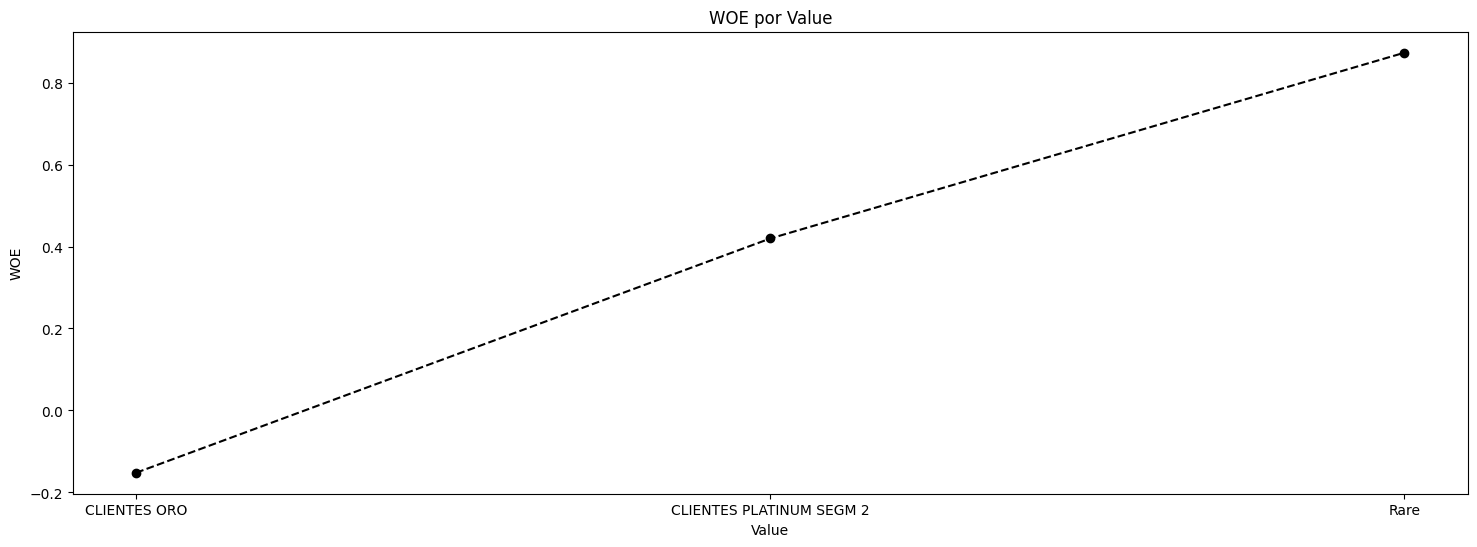

In [74]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'SEGMENTOCLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

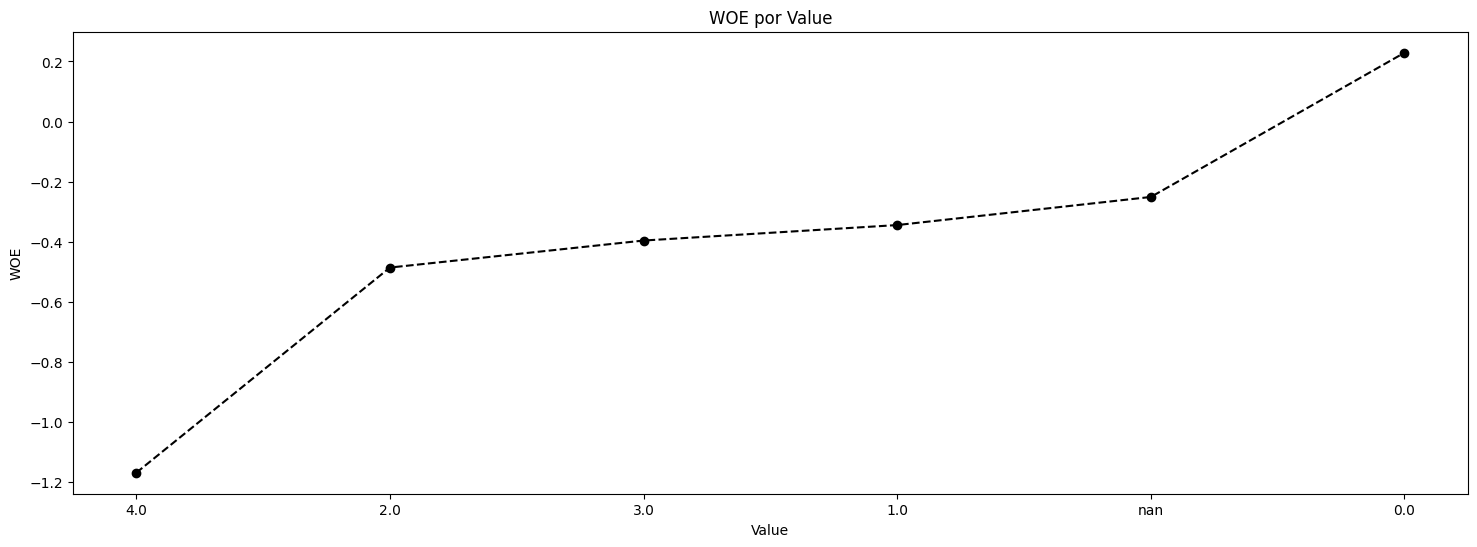

In [75]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'CLASIF_SISTEMA_ULT_12M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

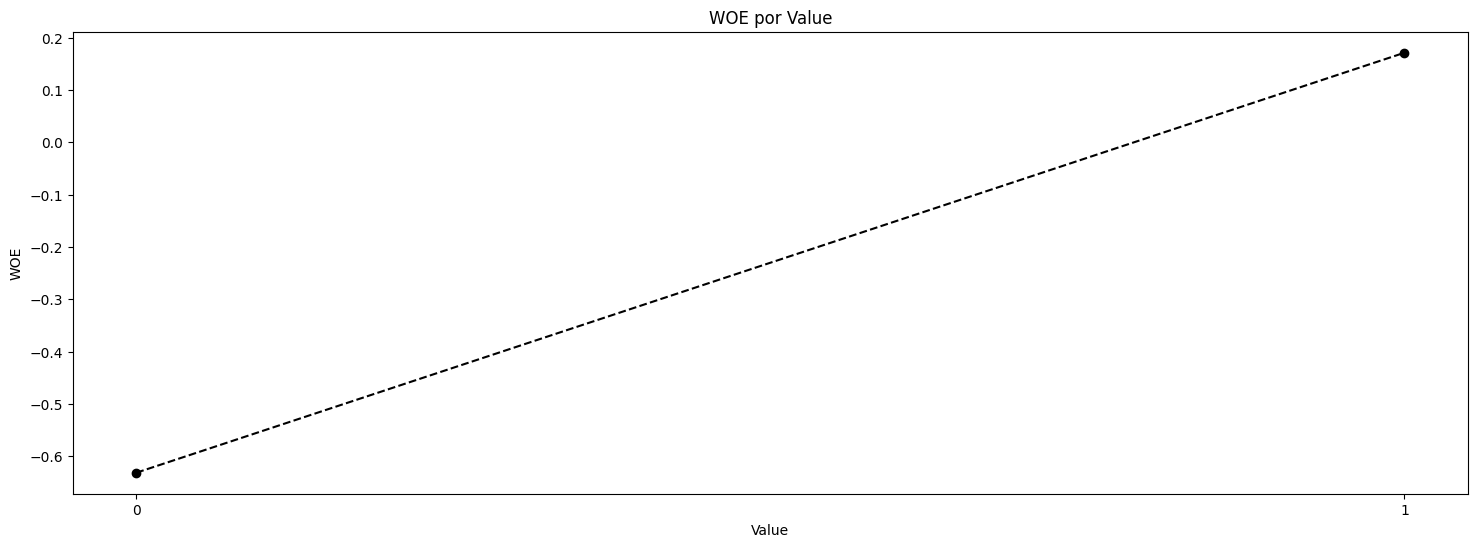

In [76]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'FLG_PDH', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

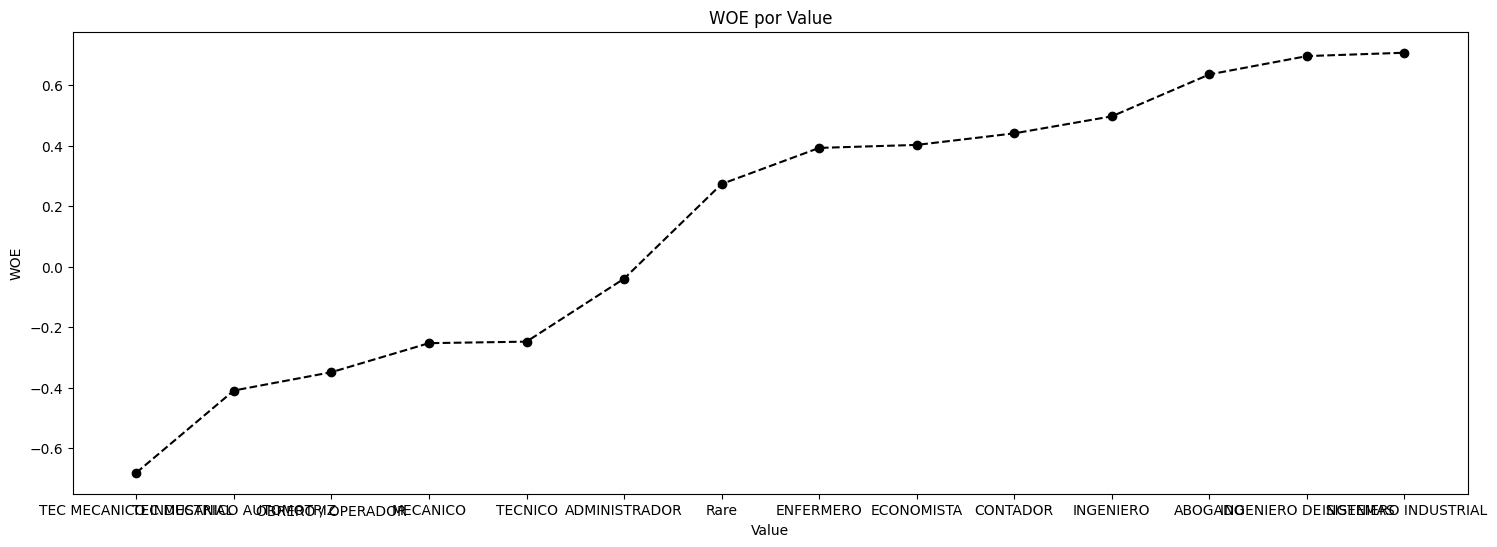

In [77]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'PROFESION', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)

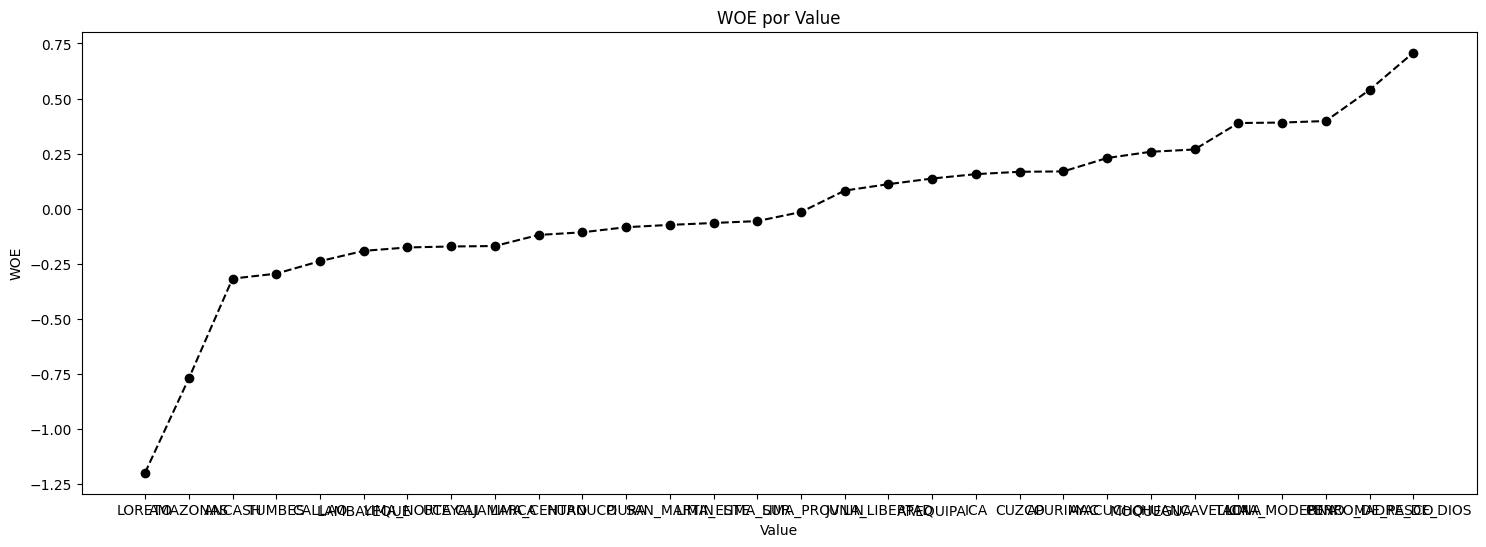

In [78]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'ZONA_DEL_DESEMBOLSO', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v5)

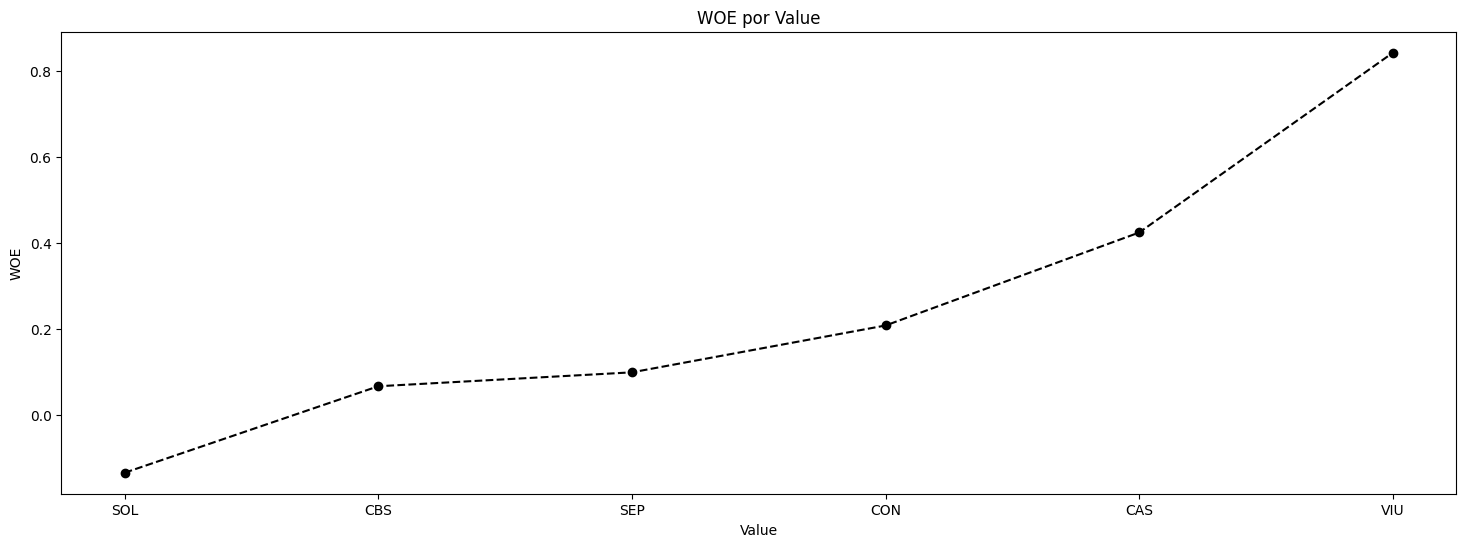

In [79]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'ESTADO_CIVIL', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v6)

### 4.2 Variables numéricas

#### En este punto discretizo para luego encontrar el IV de las variables

In [80]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [81]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t[num_cols])

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['DEUDA', 'PLAZO_CREDITO',
                                     'ATRASO_MAXIMO_ULT_6M',
                                     'ATRASO_MAXIMO_ULT_12M',
                                     'ATRASO_MAXIMO_ULT_24M',
                                     'MESES_AHORROS_ULT_6M',
                                     'MEDIANA_AHORROS_ULT_6M',
                                     'DEUDA_TOTAL_SISTEMA',
                                     'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA',
                                     'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA',
                                     'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])

In [82]:
X_train_t_numdisc=disc1.transform(X_train_t[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t[num_cols])

In [83]:
X_train_t_numdisc.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,"(1.705, inf]","(0.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.996, 2.205]","(-inf, -0.282]","(-0.471, inf]","(-inf, 0.0]","(2.201, inf]","(-0.154, 0.0]","(-0.283, -0.227]","(0.179, 0.43]","(0.545, 0.664]"
27337,"(-0.172, 0.0]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, -4.0]","(0.218, 0.524]","(2.602, inf]","(-inf, -1.353]","(0.0, 0.216]","(0.481, 1.033]","(-0.692, -0.538]","(1.057, 2.284]","(0.43, 0.722]","(0.0, 0.282]"
573,"(0.0, 0.212]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(5.83e-17, 0.218]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.0, 0.173]","(0.385, 0.692]","(0.51, 1.057]","(-0.337, -0.169]","(-0.209, -0.155]"
31740,"(-0.473, -0.387]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.218, 0.524]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.173, 0.481]","(0.692, 1.231]","(0.51, 1.057]","(0.722, 1.113]","(-0.209, -0.155]"
25079,"(-0.286, -0.172]","(-1.5, -1.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(-0.162, 5.83e-17]","(2.602, inf]","(-0.471, inf]","(3.63, inf]","(2.201, inf]","(0.692, 1.231]","(2.284, inf]","(0.179, 0.43]","(0.664, inf]"


### Veamos cuales son las variables numéricas más importantes, basado en su IV

In [84]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_DEFAULT_12M
1517,"(1.705, inf]","(0.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.996, 2.205]","(-inf, -0.282]","(-0.471, inf]","(-inf, 0.0]","(2.201, inf]","(-0.154, 0.0]","(-0.283, -0.227]","(0.179, 0.43]","(0.545, 0.664]",0
27337,"(-0.172, 0.0]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, -4.0]","(0.218, 0.524]","(2.602, inf]","(-inf, -1.353]","(0.0, 0.216]","(0.481, 1.033]","(-0.692, -0.538]","(1.057, 2.284]","(0.43, 0.722]","(0.0, 0.282]",0
573,"(0.0, 0.212]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(5.83e-17, 0.218]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.0, 0.173]","(0.385, 0.692]","(0.51, 1.057]","(-0.337, -0.169]","(-0.209, -0.155]",0
31740,"(-0.473, -0.387]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.218, 0.524]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.173, 0.481]","(0.692, 1.231]","(0.51, 1.057]","(0.722, 1.113]","(-0.209, -0.155]",0
25079,"(-0.286, -0.172]","(-1.5, -1.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(-0.162, 5.83e-17]","(2.602, inf]","(-0.471, inf]","(3.63, inf]","(2.201, inf]","(0.692, 1.231]","(2.284, inf]","(0.179, 0.43]","(0.664, inf]",0


In [85]:
getFeatureIV_Importance(tot_train_t2,num_cols,"FLG_DEFAULT_12M")

,Feature,IV
6,MEDIANA_AHORROS_ULT_6M,0.358339
10,INGRESO_CLIENTE,0.337741
5,MESES_AHORROS_ULT_6M,0.201981
8,NUMERO_DE_PAGOS_PDH,0.183294
1,PLAZO_CREDITO,0.173877
13,LINEA_DE_TC,0.082388
11,EDAD_T,0.079741
14,MONTO_TC_MEMBRESIA,0.058139
0,DEUDA,0.046217
4,ATRASO_MAXIMO_ULT_24M,0.034082


### Nuevamente, en este punto también solo quedémonos con las variables numéricas con IV mayor a 2% y menor a 50%

In [86]:
num_cols_2=['MEDIANA_AHORROS_ULT_6M','INGRESO_CLIENTE','MESES_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH','PLAZO_CREDITO','LINEA_DE_TC','EDAD_T',
            'MONTO_TC_MEMBRESIA','DEUDA','ATRASO_MAXIMO_ULT_24M','DEUDA_TOTAL_SISTEMA','ATRASO_MAXIMO_ULT_12M']

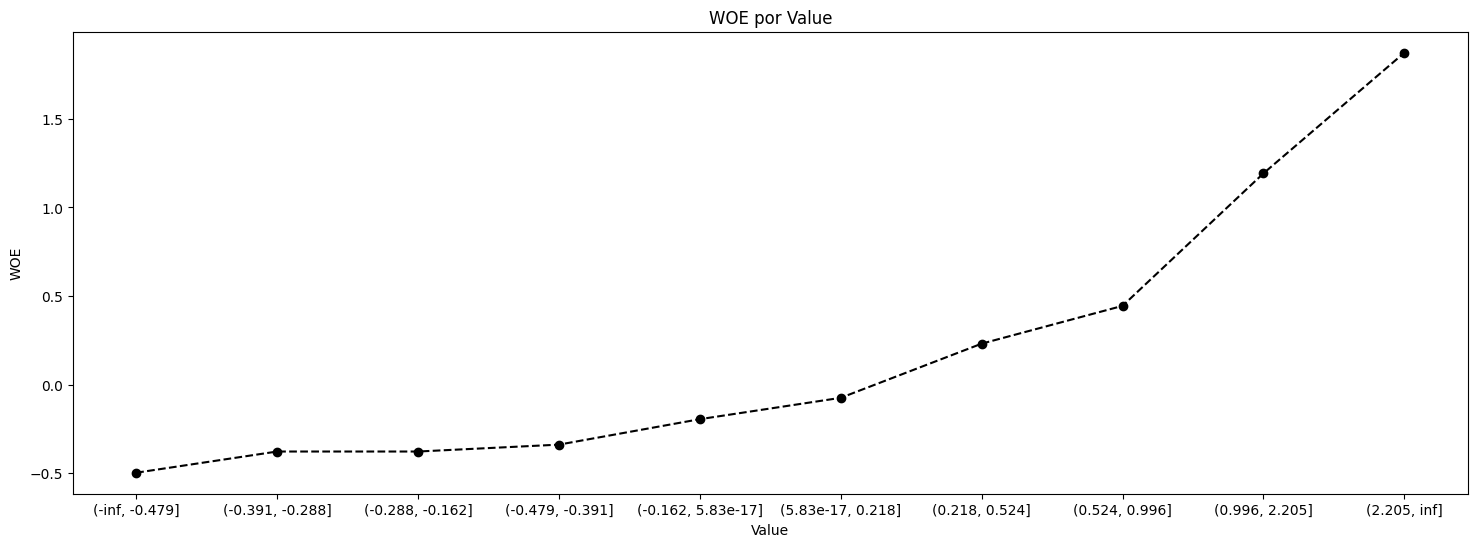

In [87]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t2, 'MEDIANA_AHORROS_ULT_6M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

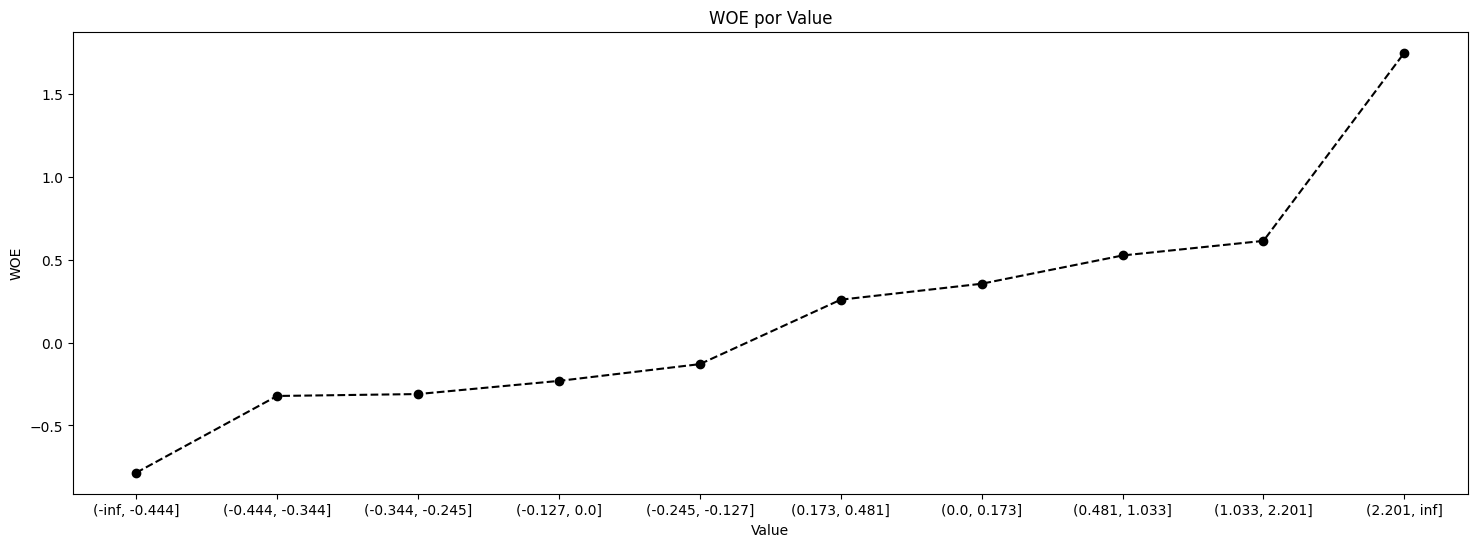

In [88]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t2, 'INGRESO_CLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

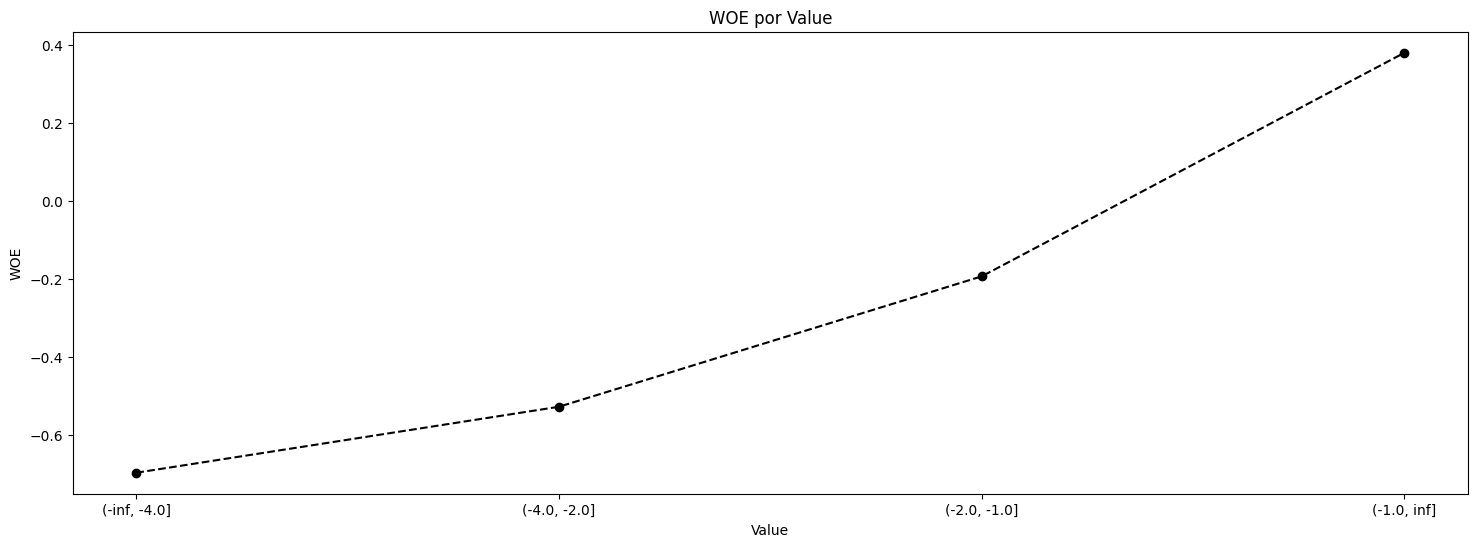

In [89]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t2, 'MESES_AHORROS_ULT_6M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

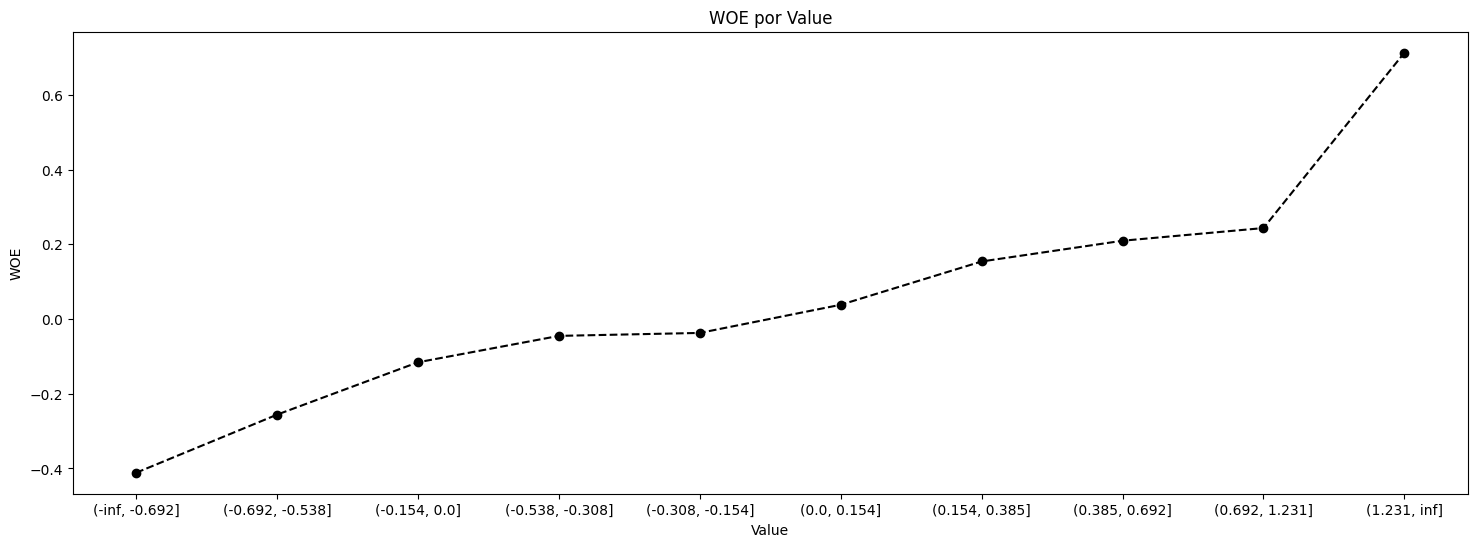

In [90]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t2, 'EDAD_T', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)

### 4.3 Codificación de variables

#### Variables Categóricas

In [91]:
from feature_engine.encoding import WoEEncoder

In [92]:
encoder_2 = WoEEncoder(variables=cat_cols,
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t[cat_cols], y_train)

WoEEncoder(fill_value=0,
           variables=['FLG_GARANTIA', 'SEGMENTOCLIENTE', 'TARJETA_RELACIONADA',
                      'VEHICULAR_RELACIONADA', 'HIPOTECARIO_RELACIONADA',
                      'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
                      'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_TC_VISA',
                      'FLG_TC_MC'])

In [93]:
X_train_woe_enc = encoder_2.transform(X_train_t[cat_cols])
X_test_woe_enc = encoder_2.transform(X_test_t[cat_cols])

In [94]:
X_train_woe_enc.head()

,FLG_GARANTIA,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC
1517,0.033388,-0.419546,0.069405,0.002526,0.017669,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.078146,0.073294
27337,-1.267551,-0.419546,-0.126722,0.002526,-1.242477,-0.229072,0.631614,-0.441326,0.073878,0.134467,-0.128297,-0.114725
573,0.033388,0.151884,-0.126722,0.002526,0.017669,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,-0.128297,-0.114725
31740,0.033388,0.151884,-0.126722,0.002526,0.017669,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,-0.128297,-0.114725
25079,0.033388,-0.419546,0.069405,0.002526,-1.242477,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.078146,0.073294


### Actualizamos nuestro pipeline con todo el flujo de tratamiento de datos

In [95]:
pipe_5 = Pipeline(
    [
        (   "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (   "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (   "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (   "encoder_2",
            WoEEncoder(variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'],
                       fill_value=0)
        ),
    ]
)

In [96]:
pipe_5.fit(X_train,y_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'CUOTA', 'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False)),
                ('encoder_2',
                 WoEEncoder(fill_value=0,
                            variables=['FLG_GARANTIA', 'SEGMENTOCLIENTE',
                                       'TARJETA_RELACIONADA',
                                       'VEHICULAR_RELACIONADA',
                                       'HIPOTECARIO_RELACIONADA',
                                       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                                       'PROFESION', 'ZONA_DEL_DESEMBOLSO',
                                       'ESTADO_CIVIL', 'FLG_TC_VISA',
                                       'FLG_TC_MC']))])

In [97]:
X_train_t_p = pipe_5.transform(X_train)
X_test_t_p = pipe_5.transform(X_test)

In [98]:
X_train_t_p.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,...,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC
1517,2.197672,0.5,0.0,0.0,0.0,0.0,1.446314,-0.285436,0.000000,-0.114250,...,0.069405,0.002526,0.017669,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.078146,0.073294
27337,-0.133657,0.0,0.0,0.0,0.0,-6.0,0.400565,6.247261,-1.352941,0.108265,...,-0.126722,0.002526,-1.242477,-0.229072,0.631614,-0.441326,0.073878,0.134467,-0.128297,-0.114725
573,0.163433,0.0,0.0,0.0,0.0,0.0,0.002082,0.765005,0.000000,-0.114250,...,-0.126722,0.002526,0.017669,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,-0.128297,-0.114725
31740,-0.470631,0.0,0.0,0.0,0.0,0.0,0.451028,0.892976,0.000000,-0.114250,...,-0.126722,0.002526,0.017669,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,-0.128297,-0.114725
25079,-0.176282,-1.0,0.0,0.0,0.0,0.0,-0.126619,12.930532,0.000000,3.809300,...,0.069405,0.002526,-1.242477,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.078146,0.073294


### 4.4 Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [99]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [100]:
X_train_t2=pd.concat([X_train_t_p[cat_cols_2], X_train_t_p[num_cols_2]], axis=1)
X_test_t2=pd.concat([X_test_t_p[cat_cols_2], X_test_t_p[num_cols_2]], axis=1)
X_train_t2.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,HIPOTECARIO_RELACIONADA,MEDIANA_AHORROS_ULT_6M,INGRESO_CLIENTE,MESES_AHORROS_ULT_6M,NUMERO_DE_PAGOS_PDH,PLAZO_CREDITO,LINEA_DE_TC,EDAD_T,MONTO_TC_MEMBRESIA,DEUDA,ATRASO_MAXIMO_ULT_24M,DEUDA_TOTAL_SISTEMA,ATRASO_MAXIMO_ULT_12M
1517,-0.419546,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.033388,0.017669,1.446314,2.868168,0.0,0.000000,0.5,0.233097,-0.076923,0.663636,2.197672,0.0,-0.285436,0.0
27337,-0.419546,-0.229072,0.631614,-0.441326,0.073878,0.134467,-1.267551,-1.242477,0.400565,1.000018,-6.0,-1.352941,0.0,0.465725,-0.538462,0.027273,-0.133657,0.0,6.247261,0.0
573,0.151884,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,0.033388,0.017669,0.002082,0.091014,0.0,0.000000,0.0,-0.265526,0.461538,-0.190909,0.163433,0.0,0.765005,0.0
31740,0.151884,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,0.033388,0.017669,0.451028,0.264821,0.0,0.000000,0.0,0.867921,0.769231,-0.172727,-0.470631,0.0,0.892976,0.0
25079,-0.419546,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.033388,-1.242477,-0.126619,5.639764,0.0,0.000000,-1.0,0.343121,1.000000,2.754545,-0.176282,0.0,12.930532,0.0


In [101]:
corr_features = correlation(X_train_t2, 0.5)
len(set(corr_features))

0.6135156595958196 HIPOTECARIO_RELACIONADA FLG_GARANTIA
0.5758212989277812 INGRESO_CLIENTE SEGMENTOCLIENTE
0.6363092170734017 INGRESO_CLIENTE MEDIANA_AHORROS_ULT_6M
0.7235566123750897 NUMERO_DE_PAGOS_PDH FLG_PDH
0.5436368374368802 LINEA_DE_TC INGRESO_CLIENTE
0.5201603957306808 MONTO_TC_MEMBRESIA INGRESO_CLIENTE
0.6052085415511348 MONTO_TC_MEMBRESIA LINEA_DE_TC
0.577312241510113 DEUDA PLAZO_CREDITO
0.5276972142002392 DEUDA_TOTAL_SISTEMA HIPOTECARIO_RELACIONADA
0.5924502298651697 DEUDA_TOTAL_SISTEMA INGRESO_CLIENTE
0.6645233658004901 ATRASO_MAXIMO_ULT_12M ATRASO_MAXIMO_ULT_24M


9

In [102]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.5,
    method='pearson',
    missing_values='ignore'
)
sel.fit(X_train_t2)

DropCorrelatedFeatures(threshold=0.5)

In [103]:
X_train_t2_p = sel.transform(X_train_t2)
X_test_t2_p = sel.transform(X_test_t2)

In [104]:
X_train_t2_p.shape, X_test_t2_p.shape

((22360, 14), (9584, 14))

In [105]:
X_train_t2_p.columns

Index(['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA',
       'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC',
       'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'],
      dtype='object')

In [106]:
cat_cols_3=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA']

In [107]:
num_cols_3=['MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC', 'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M']

### Alternativamente usaremos las variables numéricas discretizadas y codificadas

In [108]:
X_train_t_numdisc.columns

Index(['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T',
       'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],
      dtype='object')

In [109]:
X_train_t_numdisc.shape

(22360, 15)

In [110]:
encoder_4 = WoEEncoder(#variables=num_cols,
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t_numdisc, y_train)

WoEEncoder(fill_value=0)

In [111]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc)
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc)

In [112]:
X_train_woe_enc2.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,0.039254,-0.103855,0.0,-0.057462,-0.073017,-0.380749,-1.192188,-0.083611,-0.392951,-0.077143,-1.749389,0.115789,-0.087943,0.088857,-0.005886
27337,0.197495,0.373314,0.0,-0.057462,-0.073017,0.696012,-0.230653,-0.466773,0.622876,-0.028224,-0.525613,0.255996,0.096084,-0.211847,-0.108941
573,0.009753,0.373314,0.0,-0.057462,-0.073017,-0.380749,0.075099,0.031950,-0.392951,-0.077143,-0.354998,-0.209728,0.024599,0.078626,0.039955
31740,-0.331184,0.373314,0.0,-0.057462,-0.073017,-0.380749,-0.230653,0.031950,-0.392951,-0.077143,-0.258734,-0.243696,0.024599,-0.151363,0.039955
25079,0.052119,-0.602574,0.0,-0.057462,-0.073017,-0.380749,0.195691,-0.466773,-0.392951,-0.141847,-1.749389,-0.243696,-0.337293,0.088857,-0.852756


In [113]:
X_train_t3_p=pd.concat([X_train_t2_p[cat_cols_3], X_train_woe_enc2[num_cols_3]], axis=1)
X_test_t3_p=pd.concat([X_test_t2_p[cat_cols_3], X_test_woe_enc2[num_cols_3]], axis=1)

## **5. Entrenamiento del Modelo**
En esta sección construiremos tres tipos de modelos y los evaluaremos para quedarnos con el mejor de ellos

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [115]:
logit = LogisticRegression()
logit.fit(X_train_t2_p, y_train)
pred_train_logit = logit.predict_proba(X_train_t2_p)
pred_test_logit = logit.predict_proba(X_test_t2_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit[:,1])))

Train set
Logistic regression roc-auc: 0.7587740842157483
Test set
Logistic regression roc-auc: 0.7386640102961273


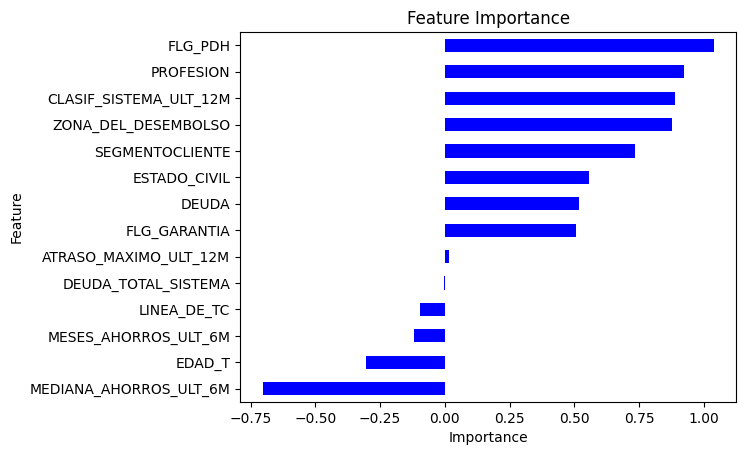

In [116]:
fi=pd.Series(logit.coef_[0],index=logit.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [117]:
logit_2 = LogisticRegression()
logit_2.fit(X_train_t3_p, y_train)
pred_train_logit_2 = logit_2.predict_proba(X_train_t3_p)
pred_test_logit_2 = logit_2.predict_proba(X_test_t3_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_2[:,1])))

Train set
Logistic regression roc-auc: 0.7575954304978958
Test set
Logistic regression roc-auc: 0.7355226306877231


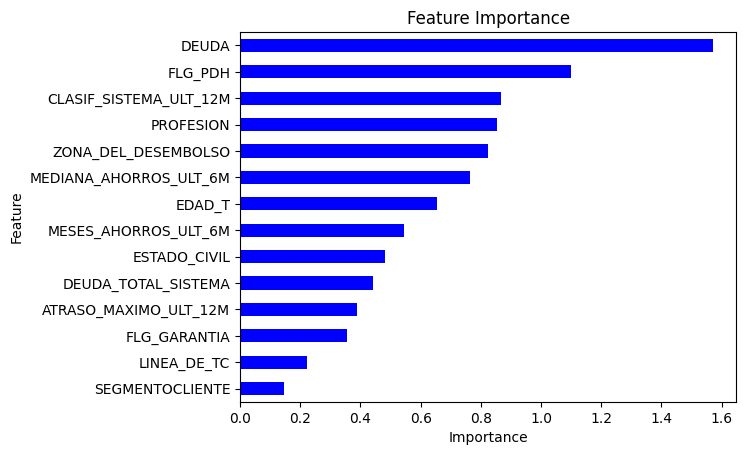

In [118]:
fi=pd.Series(logit_2.coef_[0],index=logit_2.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [119]:
rf = RandomForestClassifier(random_state=39)
rf.fit(X_train_t2_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t2_p)
pred_test_rf = rf.predict_proba(X_test_t2_p)
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.7288353964800032


In [120]:
gbc = GradientBoostingClassifier(random_state=44)
gbc.fit(X_train_t2_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train_gbc[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.8161582917992517
Test set
Gradient Boosted Trees roc-auc: 0.748698623738975


### En este punto haremos un zoom en las técnicas tanto tradicionales (en este caso Regresión Logística) como las Técnicas Avanzadas (Random Forest, Gradient Boosting, etc)

## **5.1. Regresión Logística**

### Usemos statmodels

In [121]:
import statsmodels.api as sm

In [122]:
X_train_t3_p_addcons = sm.add_constant(X_train_t3_p)
logit_sm = sm.Logit(y_train,X_train_t3_p_addcons)
results_logit_sm = logit_sm.fit()

Optimization terminated successfully.
         Current function value: 0.209245
         Iterations 8


In [123]:
results_logit_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        FLG_DEFAULT_12M   No. Observations:                22360
Model:                          Logit   Df Residuals:                    22345
Method:                           MLE   Df Model:                           14
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                  0.1139
Time:                        22:42:05   Log-Likelihood:                -4678.7
converged:                       True   LL-Null:                       -5280.2
Covariance Type:            nonrobust   LLR p-value:                3.830e-248
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.7036      0.031    -87.098      0.000      -2.764      -2.643
SEGMENTOCLIENTE            0.1485      0.126      1.182      0.237      -0.098       0.395
CLASIF_SISTEMA_ULT_12M     0.8737      0.070     12.455      0.000       0.736       1.011
FLG_PDH                    1.1115      0.083     13.371      0.000       0.949       1.274
PROFESION                  0.8628      0.100      8.647      0.000       0.667       1.058
ZONA_DEL_DESEMBOLSO        0.8238      0.114      7.239      0.000       0.601       1.047
ESTADO_CIVIL               0.4882      0.141      3.470      0.001       0.213       0.764
FLG_GARANTIA               0.3874      0.194      1.999      0.046       0.008       0.767
MEDIANA_AHORROS_ULT_6M     0.7670      0.065     11.741      0.000       0.639       0.895
MESES_AHORROS_ULT_6M       0.5481      0.065      8.375      0.000       0.420       0.676
LINEA_DE_TC                0.2288      0.115      1.986      0.047       0.003       0.455
EDAD_T                     0.6583      0.116      5.694      0.000       0.432       0.885
DEUDA                      1.6023      0.145     11.085      0.000       1.319       1.886
DEUDA_TOTAL_SISTEMA        0.4717      0.187      2.526      0.012       0.106       0.838
ATRASO_MAXIMO_ULT_12M      0.3976      0.156      2.548      0.011       0.092       0.703
==========================================================================================
"""

In [124]:
X_test_t3_p_addcons = sm.add_constant(X_test_t3_p)

In [125]:
y_test.value_counts()

,count
FLG_DEFAULT_12M,
0,8977
1,607


In [126]:
607/(8977+607)

0.0633347245409015

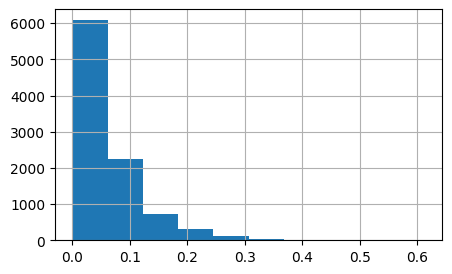

In [127]:
results_logit_sm.predict(X_test_t3_p_addcons).hist(figsize = (5, 3))
plt.show()

In [128]:
tr = 0.5
pred_test_logit_sm = np.where(results_logit_sm.predict(X_test_t3_p_addcons) > tr, 1, 0)
pred_test_logit_sm

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
pd.crosstab(y_test, pred_test_logit_sm , rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,8972,5
1,603,4


In [130]:
pd.crosstab(y_test, pred_test_logit_sm , rownames = ['Actual'], colnames = ['Predicted'])/y_test.shape[0]

Predicted,0,1
Actual,,
0,0.936144,0.000522
1,0.062917,0.000417


### Usemos scikitlearn

In [131]:
logit_skl = LogisticRegression(penalty='l2', class_weight='balanced') #class_weight='balanced' ; #penalty='l2' (por default)
logit_skl.fit(X_train_t3_p, y_train)

LogisticRegression(class_weight='balanced')

In [132]:
logit_skl.intercept_

array([-0.01033036])

In [133]:
logit_skl_summary = pd.DataFrame(X_train_t3_p.columns.values, columns=['Features'])
logit_skl_summary['Weights'] = logit_skl.coef_[0]
logit_skl_summary

,Features,Weights
0,SEGMENTOCLIENTE,0.139267
1,CLASIF_SISTEMA_ULT_12M,0.901420
2,FLG_PDH,1.222821
3,PROFESION,0.828129
4,ZONA_DEL_DESEMBOLSO,0.798479
5,ESTADO_CIVIL,0.561083
6,FLG_GARANTIA,0.438297
7,MEDIANA_AHORROS_ULT_6M,0.783093
8,MESES_AHORROS_ULT_6M,0.576871
9,LINEA_DE_TC,0.216656


In [134]:
tr = 0.5
pred_test_logit_skl = np.where(logit_skl.predict_proba(X_test_t3_p)[:,1] > tr, 1, 0)
pred_test_logit_skl

array([0, 0, 1, ..., 1, 0, 1])

In [135]:
pd.crosstab(y_test, pred_test_logit_skl , rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6018,2959
1,190,417


In [136]:
pd.crosstab(y_test, pred_test_logit_skl , rownames = ['Actual'], colnames = ['Predicted'])/y_test.shape[0]

Predicted,0,1
Actual,,
0,0.627922,0.308744
1,0.019825,0.043510


#### Tambien podemos sacar esto de forma directa con las clases accuracy score y confusion matrix de scikitlearn

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score

In [138]:
accuracy_score(y_test, logit_skl.predict(X_test_t3_p))

0.6714315525876461

In [139]:
balanced_accuracy_score(y_test, logit_skl.predict(X_test_t3_p))

0.6786825163115918

In [140]:
confusion_matrix(y_test, logit_skl.predict(X_test_t3_p), labels=[0,1])

array([[6018, 2959],
       [ 190,  417]])

TN | FP

FN | TP

In [141]:
pred_train_logit_skl = logit_skl.predict_proba(X_train_t3_p)
pred_test_logit_skl = logit_skl.predict_proba(X_test_t3_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_skl[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl[:,1])))

Train set
Logistic regression roc-auc: 0.7580136102862928
Test set
Logistic regression roc-auc: 0.7357813919114912


### Entrenemos un nuevo modelo de regresión logística usando los dataset procesados por optimal binning

#### Primero, generemos un nuevo dataset con las variables seleccionadas, ahora aplicando el optimal binning

In [142]:
pip install optbinning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [143]:
from optbinning import OptimalBinning
from optbinning import BinningProcess

In [144]:
X_train_t4_p=pd.concat([X_train_t[cat_cols_3], X_train_t[num_cols_3]], axis=1)
X_test_t4_p=pd.concat([X_test_t[cat_cols_3], X_test_t[num_cols_3]], axis=1)

In [145]:
binning_process = BinningProcess(variable_names=X_train_t4_p.columns.tolist())

In [146]:
binning_process.fit(X_train_t4_p, y_train)

BinningProcess(variable_names=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M',
                               'FLG_PDH', 'PROFESION', 'ZONA_DEL_DESEMBOLSO',
                               'ESTADO_CIVIL', 'FLG_GARANTIA',
                               'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M',
                               'LINEA_DE_TC', 'EDAD_T', 'DEUDA',
                               'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'])

In [147]:
X_train_t4_p_optbinned = binning_process.transform(X_train_t4_p)
X_test_t4_p_optbinned = binning_process.transform(X_test_t4_p)

In [148]:
X_train_t4_p_optbinned.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,MEDIANA_AHORROS_ULT_6M,MESES_AHORROS_ULT_6M,LINEA_DE_TC,EDAD_T,DEUDA,DEUDA_TOTAL_SISTEMA,ATRASO_MAXIMO_ULT_12M
1517,0.435185,0.229072,0.171220,-0.039208,-0.422181,-0.126844,0.0,1.061957,0.380749,0.05002,-0.036975,-0.153404,0.093862,0.077962
27337,0.435185,0.229072,-0.631614,0.426456,-0.069943,-0.126844,0.0,0.123451,-0.733876,0.11298,-0.217313,-0.090278,0.763386,0.077962
573,-0.151884,0.229072,0.171220,0.273802,-0.177659,-0.126844,0.0,-0.088317,0.380749,-0.03244,0.204030,-0.090278,-0.084300,0.077962
31740,-0.151884,0.229072,0.171220,-0.247396,0.136696,0.415731,0.0,0.418154,0.380749,0.11298,0.204030,0.595457,-0.084300,0.077962
25079,0.435185,-0.351319,0.171220,0.545919,-0.069943,0.415731,0.0,-0.290558,0.380749,0.05002,0.250675,-0.090278,0.763386,0.077962


In [149]:
for variable in X_train_t4_p.columns:
    optb = binning_process.get_binned_variable(name=variable)
    binning_table = optb.binning_table.build()
    print(f"Puntos de corte para '{variable}': {optb.splits}")
    print(f"Tabla de binning para '{variable}':\n{binning_table}\n")

Puntos de corte para 'SEGMENTOCLIENTE': [array(['Rare', 'CLIENTES PLATINUM SEGM 2'], dtype=object), array(['CLIENTES ORO'], dtype=object)]
Tabla de binning para 'SEGMENTOCLIENTE':
                                     Bin  Count  Count (%)  Non-event  Event  \
0       [Rare, CLIENTES PLATINUM SEGM 2]   6937   0.310242       6646    291   
1                         [CLIENTES ORO]  15423   0.689758      14297   1126   
2                                Special      0   0.000000          0      0   
3                                Missing      0   0.000000          0      0   
Totals                                    22360   1.000000      20943   1417   

        Event rate       WoE        IV        JS  
0         0.041949  0.435185  0.048729  0.006044  
1         0.073008 -0.151884  0.017007  0.002124  
2         0.000000       0.0  0.000000  0.000000  
3         0.000000       0.0  0.000000  0.000000  
Totals    0.063372            0.065737  0.008167  

Puntos de corte para 'CLASIF_SIS

#### Ahora entrenemos el modelo y hallemos alguna métricas iniciales

In [150]:
logit_skl_optb = LogisticRegression(penalty='l2', class_weight='balanced') #class_weight='balanced' ; #penalty='l2' (por default)
logit_skl_optb.fit(X_train_t4_p_optbinned, y_train)

LogisticRegression(class_weight='balanced')

In [151]:
logit_skl_optb.intercept_

array([-0.010298])

In [152]:
logit_skl_optb_summary = pd.DataFrame(X_train_t4_p_optbinned.columns.values, columns=['Features'])
logit_skl_optb_summary['Weights'] = logit_skl_optb.coef_[0]
logit_skl_optb_summary

,Features,Weights
0,SEGMENTOCLIENTE,-0.117258
1,CLASIF_SISTEMA_ULT_12M,-0.903205
2,FLG_PDH,-1.149239
3,PROFESION,-0.812285
4,ZONA_DEL_DESEMBOLSO,-0.823995
5,ESTADO_CIVIL,-0.590356
6,FLG_GARANTIA,0.000000
7,MEDIANA_AHORROS_ULT_6M,-0.822440
8,MESES_AHORROS_ULT_6M,-0.588465
9,LINEA_DE_TC,-0.293258


In [153]:
accuracy_score(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned))

0.6699707846410684

In [154]:
balanced_accuracy_score(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned))

0.6817428724587951

In [155]:
confusion_matrix(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned), labels=[0,1])

array([[5999, 2978],
       [ 185,  422]])

TN | FP

FN | TP

In [156]:
pred_train_logit_skl_optb = logit_skl_optb.predict_proba(X_train_t4_p_optbinned)
pred_test_logit_skl_optb = logit_skl_optb.predict_proba(X_test_t4_p_optbinned)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_skl_optb[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl_optb[:,1])))

Train set
Logistic regression roc-auc: 0.7637570957039659
Test set
Logistic regression roc-auc: 0.7373973649298527


In [157]:
pred_test_logit_skl_optb[:,1]

array([0.42717684, 0.26268055, 0.89917338, ..., 0.56481066, 0.23820256,
       0.6869894 ])

## **5.2. Modelos Ensamblados (basados en Arboles de Decisión)**

## **5.2.0 Decision Tree**

In [159]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
DTClasif = DecisionTreeClassifier(random_state=0) #max_depth=5, ccp_alpha=0.001
DTClasif.fit(X_train_t3_p, y_train)

DecisionTreeClassifier(random_state=0)

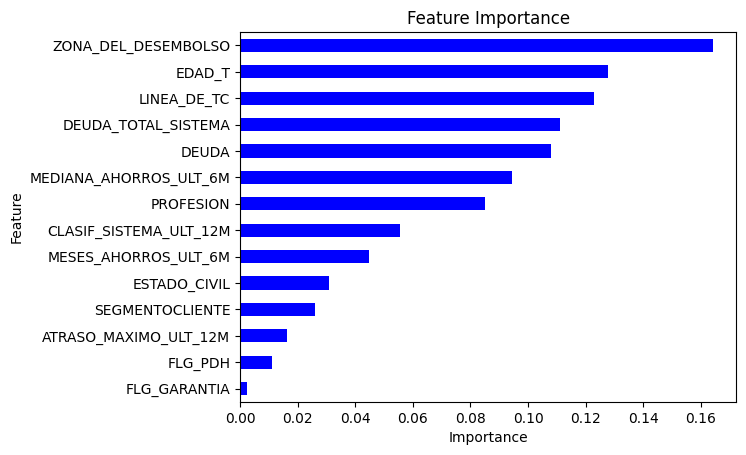

In [ ]:
fi=pd.Series(DTClasif.feature_importances_ , index=DTClasif.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
accuracy_score(y_test, DTClasif.predict(X_test_t3_p))

0.8778171953255426

In [ ]:
balanced_accuracy_score(y_test, DTClasif.predict(X_test_t3_p))

0.5415487942002251

In [ ]:
confusion_matrix(y_test, DTClasif.predict(X_test_t3_p), labels=[0,1])

array([[8318,  659],
       [ 512,   95]])

TN | FP

FN | TP

In [ ]:
pred_train_DTClasif = DTClasif.predict_proba(X_train_t3_p)
pred_test_DTClasif = DTClasif.predict_proba(X_test_t3_p)
print('Train set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_DTClasif[:,1])))
print('Test set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_DTClasif[:,1])))

Train set
Decision Tree Classifier roc-auc: 0.9999991238779614
Test set
Decision Tree Classifier roc-auc: 0.5421711057674573


In [ ]:
#Grafiquemos el decision tree
#plt.figure(figsize=(15,12))
#plot_tree(DTClasif_1, filled=True,
#          feature_names=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
#                          'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA',
#                          'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC',
#                          'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'])
#plt.show()

### Probemos con diferentes combinaciones de hiperparámetros (hiperparameter tuning), esta es la base para encontrar un modelo óptimo.

In [160]:
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
DTClasif_1 = DecisionTreeClassifier(random_state=0)
# combinaciones de hiperparametros
dt_param_grid = dict(
    max_depth= [None, 5, 10, 20],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 5],
    ccp_alpha= [0.0, 0.001, 0.01, 0.1]
)

# Grid Search
reg = GridSearchCV(DTClasif_1, dt_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_dt= reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Decision Tree):", search_dt.best_params_)
print("Mejor accuracy (Decision Tree):", search_dt.best_score_)

Mejores parámetros (Decision Tree): {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor accuracy (Decision Tree): 0.6921576701658883


In [ ]:
results = pd.DataFrame(search_dt.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_train_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'ccp_alpha': 0.0, 'max_depth': None, 'min_sam...",0.999999,3.083477e-07,0.540600,0.007012
1,"{'ccp_alpha': 0.0, 'max_depth': 20, 'min_sampl...",0.999670,1.248995e-04,0.545041,0.007343
2,"{'ccp_alpha': 0.0, 'max_depth': None, 'min_sam...",0.994536,3.198256e-04,0.547626,0.010029
3,"{'ccp_alpha': 0.0, 'max_depth': 20, 'min_sampl...",0.993300,4.134239e-04,0.552768,0.007616
4,"{'ccp_alpha': 0.0, 'max_depth': None, 'min_sam...",0.992617,3.408395e-04,0.547591,0.005242
...,...,...,...,...,...
139,"{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...",0.500000,0.000000e+00,0.500000,0.000000
140,"{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...",0.500000,0.000000e+00,0.500000,0.000000
141,"{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...",0.500000,0.000000e+00,0.500000,0.000000
142,"{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...",0.500000,0.000000e+00,0.500000,0.000000


Text(0.5, 0, 'Hyperparameter space')

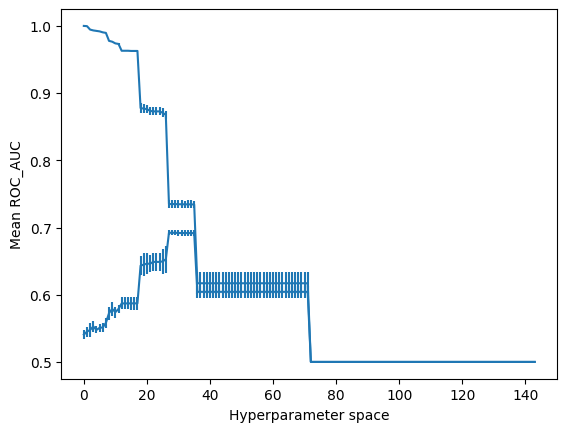

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
DTClasif_2 = DecisionTreeClassifier(random_state=0)
# combinaciones de hiperparametros
dt_param_grid = dict(
    max_depth= [None, 5, 10, 20],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 5],
    ccp_alpha= [0.0, 0.001, 0.01, 0.1]
)

# Random Search
reg = RandomizedSearchCV(DTClasif_2, dt_param_grid, scoring='roc_auc', return_train_score=True, n_iter = 70, cv=5, n_jobs=-1)
search_dt= reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Decision Tree):", search_dt.best_params_)
print("Mejor accuracy (Decision Tree):", search_dt.best_score_)

Mejores parámetros (Decision Tree): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 5, 'ccp_alpha': 0.0}
Mejor accuracy (Decision Tree): 0.6921576701658883


In [ ]:
results = pd.DataFrame(search_dt.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_train_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.999999,3.083477e-07,0.540600,0.007012
1,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.992617,3.408395e-04,0.547591,0.005242
2,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.991890,4.152292e-04,0.550742,0.005632
3,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.989634,5.581999e-04,0.558146,0.007574
4,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.977732,6.844461e-04,0.572642,0.009679
...,...,...,...,...,...
65,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.500000,0.000000e+00,0.500000,0.000000
66,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.500000,0.000000e+00,0.500000,0.000000
67,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.500000,0.000000e+00,0.500000,0.000000
68,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.500000,0.000000e+00,0.500000,0.000000


Text(0.5, 0, 'Hyperparameter space')

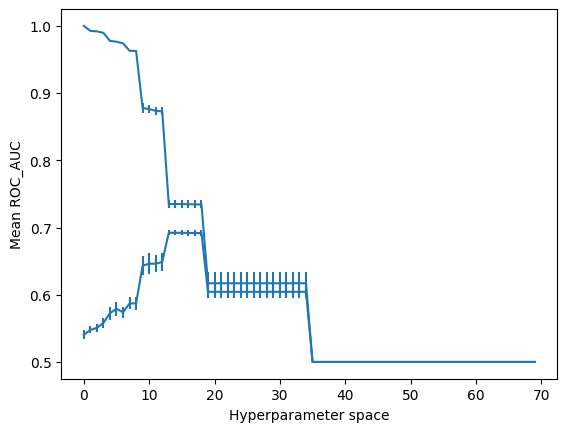

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
pred_train_DTClasif = search_dt.predict_proba(X_train_t3_p)
pred_test_DTClasif = search_dt.predict_proba(X_test_t3_p)
print('Train set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_DTClasif[:,1])))
print('Test set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_DTClasif[:,1])))

Train set
Decision Tree Classifier roc-auc: 0.7330738023976157
Test set
Decision Tree Classifier roc-auc: 0.6902640997797961


## **5.2.1 Bagging: Random Forest**

#### Evaluemos que la sensibilidad de cada hiperparámetro

#### Nro de árboles




In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200]
    #max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

Mejores parámetros (Random Forest): {'n_estimators': 200}
Mejor accuracy (Random Forest): 0.7236677083979807


In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.999748,6.133961e-05,0.640202,0.010563
1,{'n_estimators': 20},0.999959,1.136380e-05,0.667767,0.007224
2,{'n_estimators': 50},0.999995,3.362562e-06,0.705070,0.011786
3,{'n_estimators': 100},0.999999,4.268902e-07,0.714945,0.012204
4,{'n_estimators': 200},0.999999,2.778956e-07,0.723668,0.011305


Text(0.5, 0, 'n_estimators')

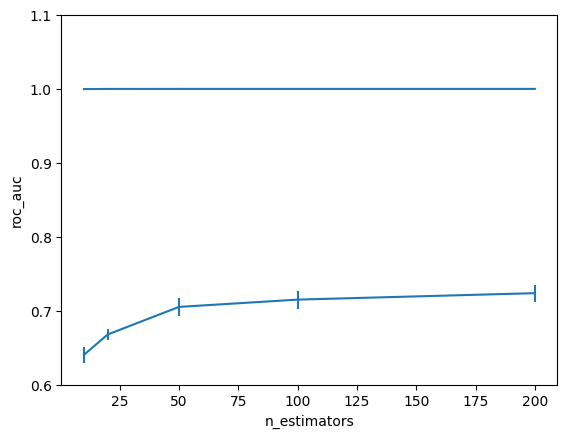

In [ ]:
# plot results
results.index = rf_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Profundidad

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200]
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20]
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

Mejores parámetros (Random Forest): {'max_depth': 10}
Mejor accuracy (Random Forest): 0.7502561547324441


In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': None},0.999999,4.268902e-07,0.714945,0.012204
1,{'max_depth': 1},0.713265,1.601596e-03,0.708444,0.008394
2,{'max_depth': 2},0.733034,1.723478e-03,0.724062,0.006083
3,{'max_depth': 3},0.746428,1.847598e-03,0.732509,0.008354
4,{'max_depth': 4},0.763148,2.503476e-03,0.739314,0.007903
5,{'max_depth': 5},0.783900,3.196890e-03,0.746863,0.008343
6,{'max_depth': 10},0.935858,2.891618e-03,0.750256,0.012120
7,{'max_depth': 15},0.998649,3.251322e-04,0.733088,0.012850
8,{'max_depth': 20},0.999987,2.505952e-06,0.724396,0.014096


Text(0.5, 0, 'max_depth')

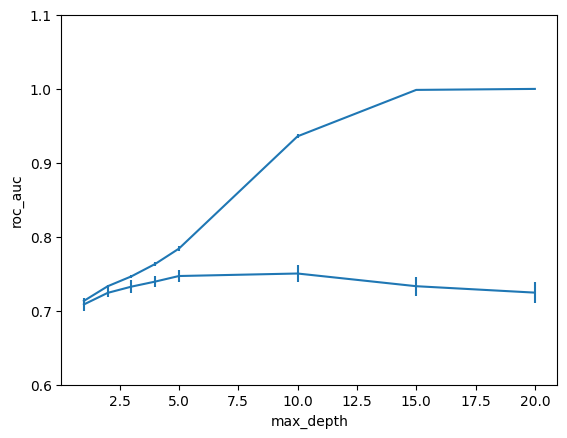

In [ ]:
# plot results
results.index = rf_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

#### Nro mínimo de observaciones para partir el nodo

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200]
    #max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20]
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

Mejores parámetros (Random Forest): {'min_samples_split': 0.01}
Mejor accuracy (Random Forest): 0.753204393774145


In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'min_samples_split': 0.01},0.842502,0.001776,0.753204,0.010689
1,{'min_samples_split': 0.05},0.776252,0.002719,0.747836,0.008124
2,{'min_samples_split': 0.1},0.759613,0.002135,0.741447,0.008744
3,{'min_samples_split': 0.2},0.743718,0.001767,0.733157,0.008143
4,{'min_samples_split': 0.3},0.733080,0.002205,0.724661,0.007700
5,{'min_samples_split': 0.5},0.716894,0.001498,0.711254,0.008626


Text(0.5, 0, 'min_samples_split')

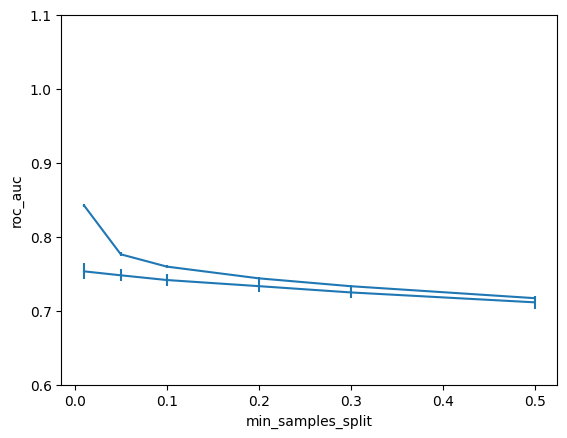

In [ ]:
# plot results
results.index = rf_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

## Veamos el GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200],
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    max_features= ['sqrt', 'log2', 0.5],
    bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
# Opciones de Cross Validation -> Esto se inserta en el hiperparámetro cv
# K-Fold Cross-Validation
#kf = KFold(n_splits=5, shuffle=True, random_state=4)
# Repeated K-Fold Cross-Validation
#rkf = RepeatedKFold(n_splits=5, n_repeats=10,random_state=4)
# Leave One Out Cross-Validation
#loo = LeaveOneOut()
# Leave P Out Cross-Validation
#lpo = LeavePOut(p=2)
# Stratified K Fold Cross-Validation
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

## Veamos el RandomSearch para encontrar la mejor combinación en el Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200],
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    max_features= ['sqrt', 'log2', 0.5],
    bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
)

# Random Search
reg = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_iter = 200, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

Mejores parámetros (Random Forest): {'n_estimators': 200, 'min_samples_split': 0.01, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Mejor accuracy (Random Forest): 0.7549544390480967


In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'n_estimators': 200, 'min_samples_split': 0.0...",0.828228,0.001988,0.754954,0.009424
1,"{'n_estimators': 200, 'min_samples_split': 0.0...",0.842580,0.001673,0.754522,0.010554
2,"{'n_estimators': 100, 'min_samples_split': 0.0...",0.876815,0.001166,0.753815,0.011673
3,"{'n_estimators': 200, 'min_samples_split': 0.0...",0.876278,0.001286,0.753537,0.010755
4,"{'n_estimators': 100, 'min_samples_split': 0.0...",0.841748,0.001615,0.753370,0.010522
...,...,...,...,...,...
195,"{'n_estimators': 50, 'min_samples_split': 0.05...",0.692478,0.006841,0.685676,0.009104
196,"{'n_estimators': 200, 'min_samples_split': 0.1...",0.692670,0.005739,0.683537,0.008186
197,"{'n_estimators': 200, 'min_samples_split': 0.0...",0.692670,0.005739,0.683537,0.008186
198,"{'n_estimators': 20, 'min_samples_split': 0.1,...",0.685160,0.007425,0.676009,0.009162


Text(0.5, 0, 'Hyperparameter space')

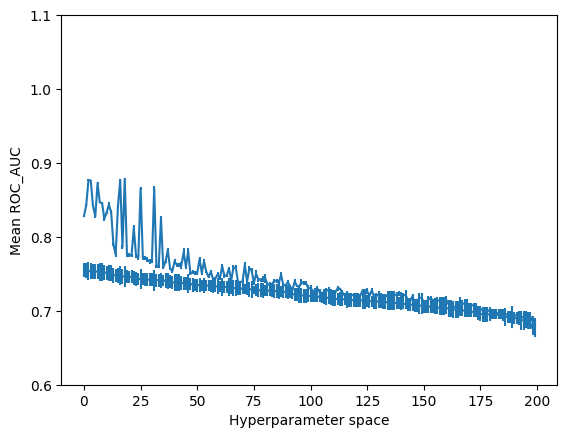

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.ylim(0.6, 1.1)
plt.xlabel('Hyperparameter space')

#### CONCLUSION RF: Evaluemos como le va al modelo con los hiperparametros elegidos en train y test

In [181]:
# Lo dejamos entrenado con los parámetros hallados
#{'n_estimators': 200, 'min_samples_split': 0.01, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
rf = RandomForestClassifier(n_estimators=200, min_samples_split=0.01, min_samples_leaf=2, max_features='log2',
                            max_depth=10, bootstrap=True, random_state=0)
rf.fit(X_train_t3_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t3_p)
pred_test_rf = rf.predict_proba(X_test_t3_p)
print('Train set')
print('Random Forest Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forest Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

Train set
Random Forest Classifier roc-auc: 0.8173932869035828
Test set
Random Forest Classifier roc-auc: 0.7479820753714554


## **5.2.2. Boosting: Gradient Boosting**


#### Evaluemos la sensibilidad de cada parámetro

#### Nro de Arboles

In [161]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500]
    #learning_rate= [0.01, 0.05, 0.1, 0.2],
    #max_depth= [1, 2, 3, 4, 5, 10],
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

Mejores parámetros (Gradient Boosting): {'n_estimators': 100}
Mejor accuracy (Gradient Boosting): 0.7544180938103764


In [162]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.746011,0.003018,0.725344,0.011082
1,{'n_estimators': 20},0.766149,0.003264,0.740074,0.011134
2,{'n_estimators': 50},0.788966,0.001986,0.751716,0.008638
3,{'n_estimators': 100},0.804254,0.002399,0.754418,0.008403
4,{'n_estimators': 200},0.823604,0.001997,0.752933,0.008687
5,{'n_estimators': 500},0.858338,0.001857,0.743040,0.008370


Text(0.5, 0, 'n_estimators')

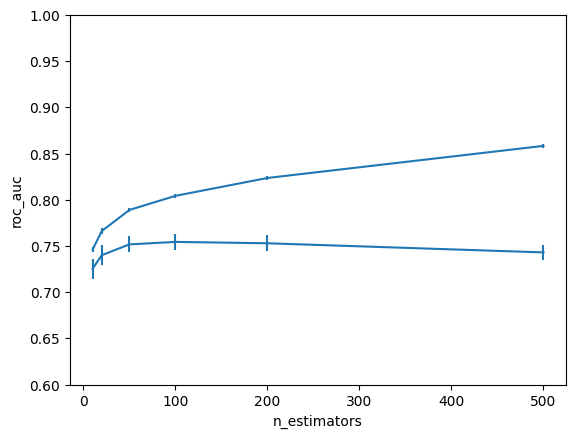

In [163]:
# plot results
results.index = gbc_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Learning Rate

In [164]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200, 500]
    learning_rate= [0.01, 0.05, 0.1, 0.2]
    #max_depth= [1, 2, 3, 4, 5, 10],
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

Mejores parámetros (Gradient Boosting): {'learning_rate': 0.1}
Mejor accuracy (Gradient Boosting): 0.7544180938103764


In [165]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'learning_rate': 0.01},0.745189,0.002842,0.725276,0.009966
1,{'learning_rate': 0.05},0.789298,0.001883,0.751761,0.008907
2,{'learning_rate': 0.1},0.804254,0.002399,0.754418,0.008403
3,{'learning_rate': 0.2},0.822969,0.002572,0.751269,0.006518


Text(0.5, 0, 'learning_rate')

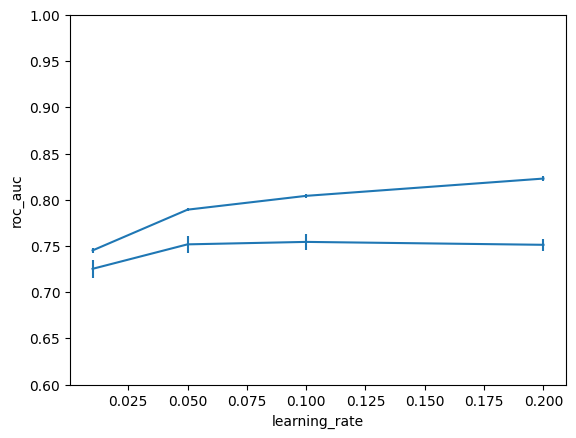

In [166]:
# plot results
results.index = gbc_param_grid['learning_rate']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('learning_rate')

#### Profundidad

In [167]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200, 500]
    #learning_rate= [0.01, 0.05, 0.1, 0.2]
    max_depth= [1, 2, 3, 4, 5, 10]
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

Mejores parámetros (Gradient Boosting): {'max_depth': 3}
Mejor accuracy (Gradient Boosting): 0.7544180938103764


In [168]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': 1},0.755946,0.002049,0.745410,0.009788
1,{'max_depth': 2},0.780203,0.001952,0.753307,0.009529
2,{'max_depth': 3},0.804254,0.002399,0.754418,0.008403
3,{'max_depth': 4},0.838626,0.001705,0.751390,0.007788
4,{'max_depth': 5},0.883318,0.003002,0.749546,0.006602
5,{'max_depth': 10},0.999992,0.000004,0.692015,0.006960


Text(0.5, 0, 'max_depth')

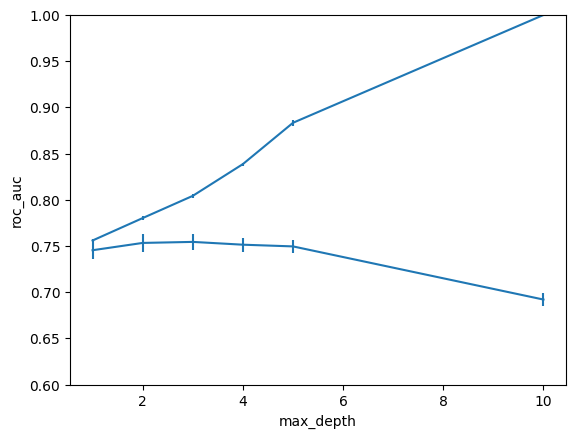

In [169]:
# plot results
results.index = gbc_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

## Veamos al GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

## Veamos el RandomSearch para encontrar la mejor combinación en el Gradient Boosting

In [173]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

# Random Search
reg = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 200, random_state=10, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

Mejores parámetros (Gradient Boosting): {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 0.2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.05}
Mejor accuracy (Gradient Boosting): 0.7602046065176271


In [174]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'subsample': 0.8, 'n_estimators': 200, 'min_s...",0.795337,0.001028,0.760205,0.007982
1,"{'subsample': 0.8, 'n_estimators': 200, 'min_s...",0.785927,0.001733,0.760132,0.007661
2,"{'subsample': 1.0, 'n_estimators': 500, 'min_s...",0.790896,0.001737,0.759959,0.009186
3,"{'subsample': 0.6, 'n_estimators': 500, 'min_s...",0.787575,0.001386,0.759662,0.010078
4,"{'subsample': 1.0, 'n_estimators': 200, 'min_s...",0.787289,0.002090,0.759429,0.009076
...,...,...,...,...,...
195,"{'subsample': 1.0, 'n_estimators': 10, 'min_sa...",0.712164,0.006487,0.697856,0.004580
196,"{'subsample': 0.6, 'n_estimators': 10, 'min_sa...",0.701915,0.002059,0.697478,0.013880
197,"{'subsample': 0.8, 'n_estimators': 10, 'min_sa...",0.705291,0.004797,0.695786,0.009705
198,"{'subsample': 1.0, 'n_estimators': 10, 'min_sa...",0.699503,0.001650,0.693303,0.010888


Text(0.5, 0, 'Hyperparameter space')

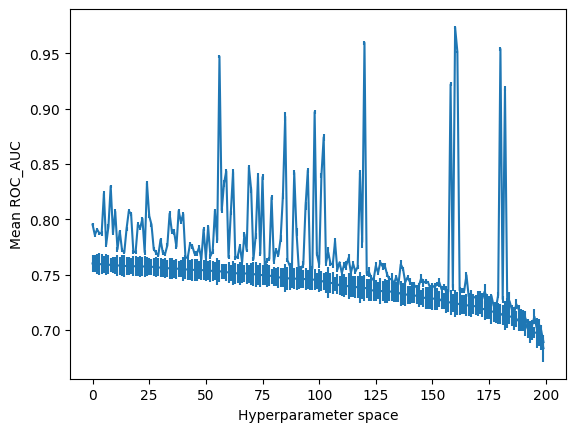

In [175]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### **Vamos añadir la técnica de Bayesian Search para Optimización de Hiperparámetros**

In [170]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.7 MB/s eta 0:00:00


In [171]:
from skopt import BayesSearchCV

In [ ]:
gbc_bs = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

#Bayesian Search
reg = BayesSearchCV(gbc_bs, gbc_param_grid, scoring='roc_auc', cv=5, n_iter=200, random_state=0, n_jobs=-1, return_train_score=True)
search_bs_gbc=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_bs_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_bs_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_bs_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### **OPCIONAL: Utilicemos Optuna**

In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):

    gbc_n_estimators = trial.suggest_int("gbc_n_estimators", 100, 1000)
    gbc_max_depth = trial.suggest_int("gbc_max_depth", 1, 4)
    gbc_min_samples_split = trial.suggest_float("gbc_min_samples_split", 0.01, 1)

    model = GradientBoostingClassifier(
        n_estimators=gbc_n_estimators,
        max_depth=gbc_max_depth,
        min_samples_split=gbc_min_samples_split
    )

    score = cross_val_score(model, X_train_t2_p, y_train, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

### **Como se ejecutaria un Random Search con Optuna**

In [ ]:
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler(),
)

study.optimize(objective, n_trials=50)

In [ ]:
study.best_params

In [ ]:
study.best_value

In [ ]:
study.trials_dataframe()

### CONCLUSION GBC: Evaluemos como le va al modelo con los parámetros elegidos en train y test

In [180]:
# Lo dejamos entrenado con los parámetros hallados
#{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 0.2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.05}
gbc = GradientBoostingClassifier(subsample=0.8, n_estimators=200, min_samples_split=0.2, min_samples_leaf=1,
                                 max_features=0.5, max_depth=5, learning_rate=0.05, random_state=0)
gbc.fit(X_train_t3_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t3_p)
pred_test_gbc = gbc.predict_proba(X_test_t3_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]))

Train roc_auc:  0.7903975744089604
Test roc_auc:  0.7446495611427997


### Entonces, basado en sus rendimientos en test, cuál es el mejor modelo?

In [182]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit_skl[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
#print('DT Test roc_auc: ', roc_auc_score(y_test, pred_test_DT[:,1]), 'DT Test GINI: ', 2*roc_auc_score(y_test, pred_test_DT[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

Logit Test roc_auc:  0.7357813919114912 Logit Test GINI:  0.47732802059225454
RF Test roc_auc:  0.7479820753714554 RF Test GINI:  0.4959641507429109
GBC Test roc_auc:  0.7446495611427997 GBC Test GINI:  0.48929912228559935


#### FINALMENTE: Si bien no hay una gran diferencia entre los 3 modelos, en cuanto a performance, el GINI más alto es el correspondiente al Modelo de **Gradient Boosting**

### Añadimos un grafico de ROC AUC sobre el modelo ganador

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t2_p, y_test)
visualizer2.score(X_test_t2_p, y_test)
visualizer2.show()

### **6. Valoración del Modelo**
Empecemos a revisar con el modelo final algunas métricas de valoración del modelo

### **Accuracy**
Porcentaje de predicciones correctas

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
br_test=y_test.value_counts() / len(y_test)
br_test

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(X_test_t2_p)))

In [ ]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, GBC test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t2_p)))

### Como está prediciendo el modelo?

In [ ]:
preds_1 = pd.DataFrame(gbc.predict(X_test_t2_p), columns = ['loan_status'])
preds_1.value_counts()

In [ ]:
6/(6+9578)

In [ ]:
preds_2 = pd.DataFrame(gbc.predict_proba(X_test_t2_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.15 else 0)
preds_2['loan_status'].value_counts()

In [ ]:
927/(927+8657)

## Identificamos un punto de corte óptimo que maximice el F1 Score

In [ ]:
from yellowbrick.classifier.threshold import DiscriminationThreshold
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gbc = GradientBoostingClassifier(max_depth= 4, min_samples_split=0.32714402838624523, n_estimators=168, random_state=0)
gbc.fit(X_train_t2_p, y_train)

In [ ]:
#visualizer = DiscriminationThreshold(gbc, is_fitted=True, random_state=0, argmax='fscore')
#visualizer.fit(X_test_t2_p, y_test)
#visualizer.score(X_test_t2_p, y_test)
#visualizer.show()

In [ ]:
from yellowbrick.classifier.threshold import discrimination_threshold
discrimination_threshold(gbc, X_test_t2_p, y_test)

In [ ]:
preds_2 = pd.DataFrame(gbc.predict_proba(X_test_t2_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.13 else 0)
preds_2['loan_status'].value_counts()

## Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(X_test_t2_p)))
print('Accuracy GBC test Corte Optimo:', accuracy_score(y_test, preds_2['loan_status']))

In [ ]:
print('Balanced accuracy Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy GBC test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t2_p)))
print('Balanced accuracy GBC test Corte Optimo:',  balanced_accuracy_score(y_test,preds_2['loan_status']))

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [ ]:
# Precision
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision GBC test:', precision_score(y_test,gbc.predict(X_test_t2_p)))
print('Precision GBC test Corte Optimo:', precision_score(y_test,preds_2['loan_status']))

In [ ]:
# Recall
print('Recall Baseline test: ', recall_score(y_test, y_test_base))
print('Recall GBC test:', recall_score(y_test,gbc.predict(X_test_t2_p)))
print('Recall GBC test Corte Optimo:', recall_score(y_test,preds_2['loan_status']))

In [ ]:
# F1-Score
print('F-measure Baseline test: ', f1_score(y_test, y_test_base))
print('F-measure GBC test:', f1_score(y_test, gbc.predict(X_test_t2_p)))
print('F-measure GBC test Corte Optimo:', f1_score(y_test, preds_2['loan_status']))

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, preds_2['loan_status'])

print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', fscore)

## Matriz de Confusión

TN | FP

FN | TP

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

In [ ]:
confusion_matrix(y_test, gbc.predict(X_test_t2_p), labels=[0,1])

In [ ]:
confusion_matrix(y_test, preds_2['loan_status'], labels=[0,1])

## **7. Técnicas de balanceo**
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [ ]:
df_clase.columns

In [ ]:
X_y_train = pd.concat([X_train_t2_p.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['FLG_DEFAULT_12M'].value_counts()
print(count_nondefault,count_default)

In [ ]:
X_y_train.shape

In [ ]:
# Separamos la muestra en 2 partes: defaults y no defaults
nondefaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 0]
defaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 1]
print(nondefaults.shape)
print(defaults.shape)

In [ ]:
# Reducimos la muestra de nondefaults
nondefaults_under = nondefaults.sample(count_default)
print(nondefaults_under.shape)

In [ ]:
# Unimos la muestra de defaults y la de nondefaults reducida
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Verificamos los nros de defaults y no defaults
print(X_y_train_under['FLG_DEFAULT_12M'].value_counts())

In [ ]:
X_y_train_under.shape

In [ ]:
X_train_rus=X_y_train_under.drop(columns='FLG_DEFAULT_12M')
X_train_rus.head()

In [ ]:
y_train_rus=X_y_train_under['FLG_DEFAULT_12M']
y_train_rus.value_counts()

In [ ]:
# set up the model
gbc2 = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc2 = RandomizedSearchCV(gbc2, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc2 = reg_gbc2.fit(X_train_rus, y_train_rus)

# best hyperparameters
search_gbc2.best_params_

In [ ]:
# Modelo GBC con balanceo y sin balanceo
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_train_gbc2 = search_gbc2.predict_proba(X_train_rus)
print('Sin Balanceo Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('Con Balanceo Train roc_auc: ', roc_auc_score(y_train_rus, pred_train_gbc2[:,1]), 'GINI Train ', 2*roc_auc_score(y_train_rus, pred_train_gbc2[:,1])-1)

In [ ]:
# Modelo GBC con balanceo y sin balanceo
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
pred_test_gbc2 = search_gbc2.predict_proba(X_test_t2_p)
print('Sin Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)
print('Con Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc2[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc2[:,1])-1)

## **8. Calibración del Modelo**
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_gbc[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

In [ ]:
mean_predicted_value

In [ ]:
fraction_of_positives

In [ ]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

In [ ]:
# Modelo Original, sin balanceo
plot_calibration_curve(y_test, pred_test_gbc[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
brier_score_loss(y_test, pred_test_gbc[:, 1])

In [ ]:
# Modelo con Undersampling
plot_calibration_curve(y_test, pred_test_gbc2[:, 1], bins=10, strategy='uniform')

In [ ]:
brier_score_loss(y_test, pred_test_gbc2[:, 1])

### Planteemos dos métodos, el ajuste por función sigmoide y el ajuste por función isotónica

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(gbc, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t2_p, y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t2_p)[:, 1]

# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(gbc, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t2_p, y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t2_p)[:, 1]

#### Revisemos la calibración Sigmoide

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

### Acaso la calibración varía la discriminación del modelo?

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid)))

### Ahora revisemos la calibración isotónica

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic)))

In [ ]:
# Sobre el modelo balanceado por undersampling
# Calibración Sigmoide
cal_sigmoid2 = CalibratedClassifierCV(search_gbc2, cv='prefit', method='sigmoid')
cal_sigmoid2.fit(X_test_t2_p, y_test)
prob_sigmoid2 = cal_sigmoid2.predict_proba(X_test_t2_p)[:, 1]

# Calibración Isotónica
cal_isotonic2 = CalibratedClassifierCV(search_gbc2, cv='prefit', method='isotonic')
cal_isotonic2.fit(X_test_t2_p, y_test)
prob_isotonic2 = cal_isotonic2.predict_proba(X_test_t2_p)[:, 1]

In [ ]:
# Calibración sigmoidea
plot_calibration_curve(y_test, prob_sigmoid2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc2[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid2)))

In [ ]:
# Calibración isotónica
plot_calibration_curve(y_test, prob_isotonic2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc2[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic2)))

## **9. Unboxing de Modelos**

---



#### Primero, entendamos la importancia de cada variable. Hagamos el ejercicio con cada tipo de algoritmo

#### **Logit**

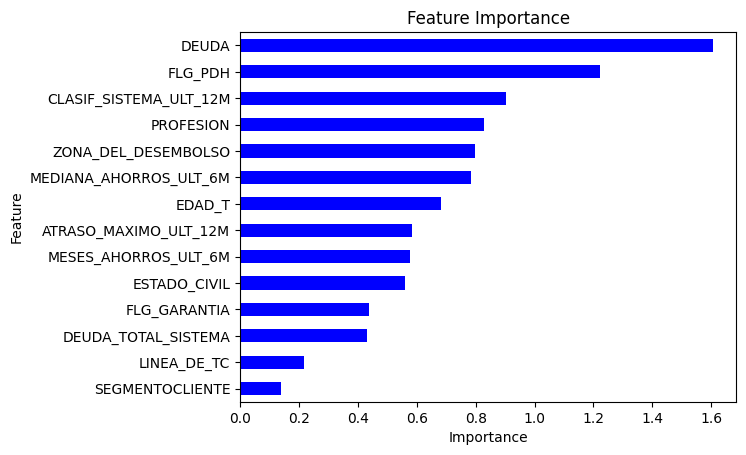

In [178]:
fi=pd.Series(logit_skl.coef_[0],index=logit_skl.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Random Forest**

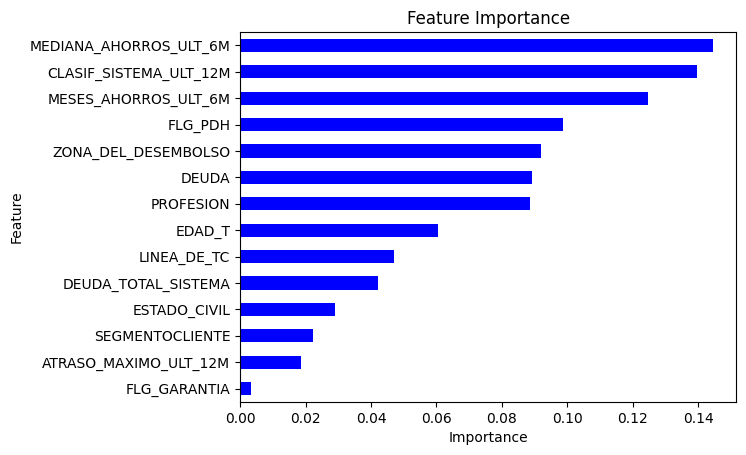

In [183]:
fi=pd.Series(rf.feature_importances_,index=rf.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Gradient Boosting**

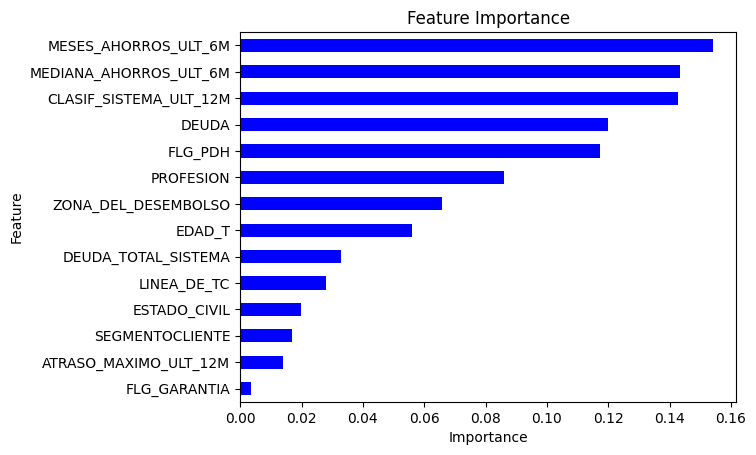

In [184]:
fi=pd.Series(gbc.feature_importances_, index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [185]:
pip install shap

In [186]:
import shap

In [187]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t3_p)
print(shap_values_bin.shape)

(9584, 14)


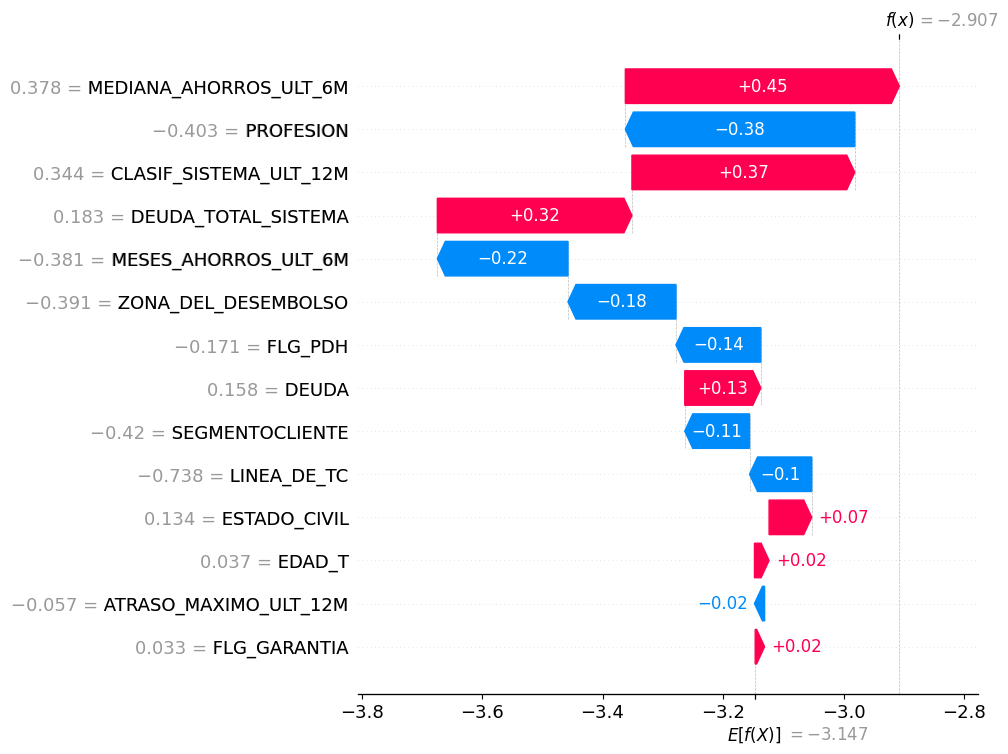

In [188]:
shap.plots.waterfall(shap_values_bin[0], max_display=30)

### En este punto hagamos la prueba de como se incrementa o reduce el riesgo según el aprote de cada variable

In [189]:
pred_test_gbc[0,1]

0.05179302490046708

In [190]:
import math

In [192]:
# el valor del log odds en la primera observación es
x=-2.907
# Por tanto su probabilidad es:
1/(1+math.exp(-x))

0.0518086109036315

#### Podemos graficar la relación entre los shap values (log odds) y los valores de una variable

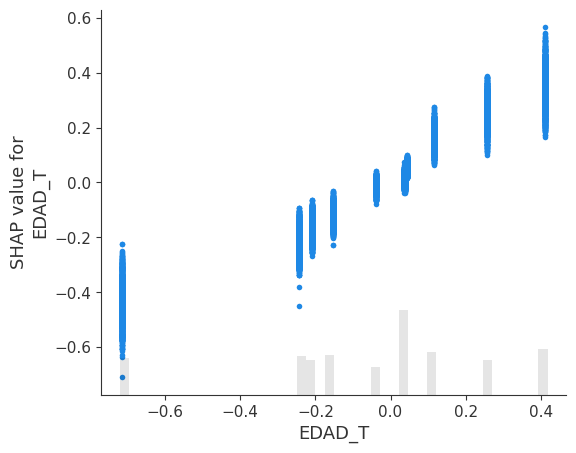

In [193]:
shap.plots.scatter(shap_values_bin[:, "EDAD_T"])

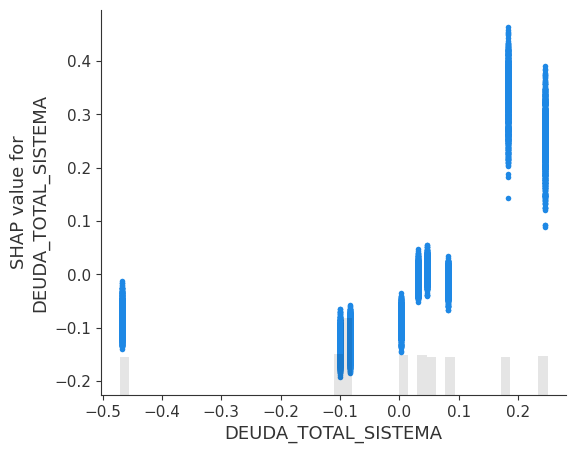

In [194]:
shap.plots.scatter(shap_values_bin[:, "DEUDA_TOTAL_SISTEMA"])

In [195]:
# En este punto revisamos el valor en probabilidad y como se explica cada punto
shap.initjs()
shap.plots.force(shap_values_bin[0],link='logit')

### Con el gráfico de barras vamos a evaluar la importancia media de cada variable

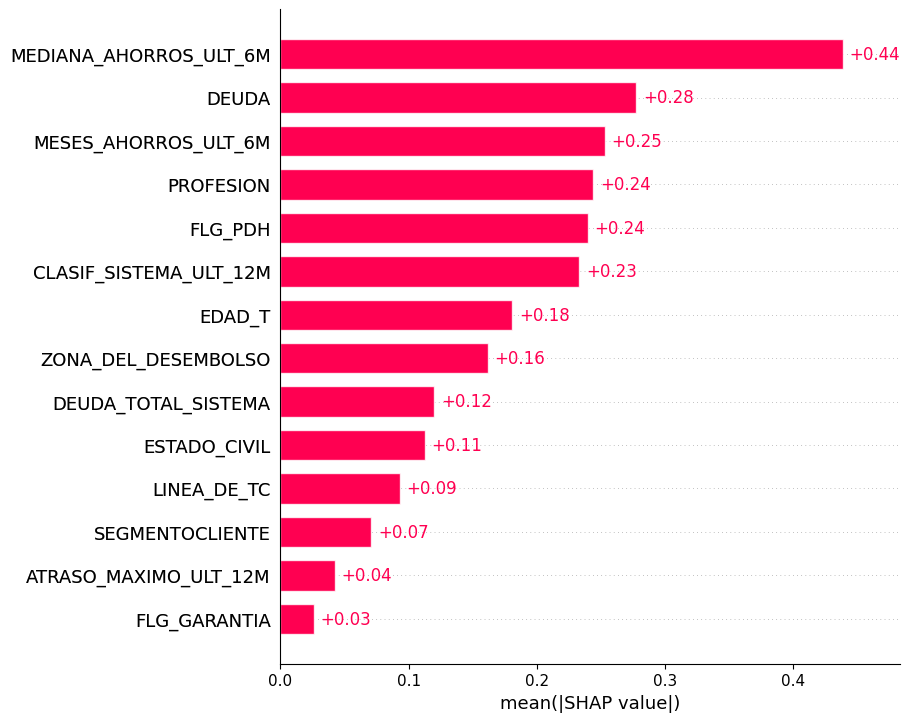

In [196]:
shap.plots.bar(shap_values_bin,max_display=30)

#### Podemos también construir un gráfico local, es decir, para una observación

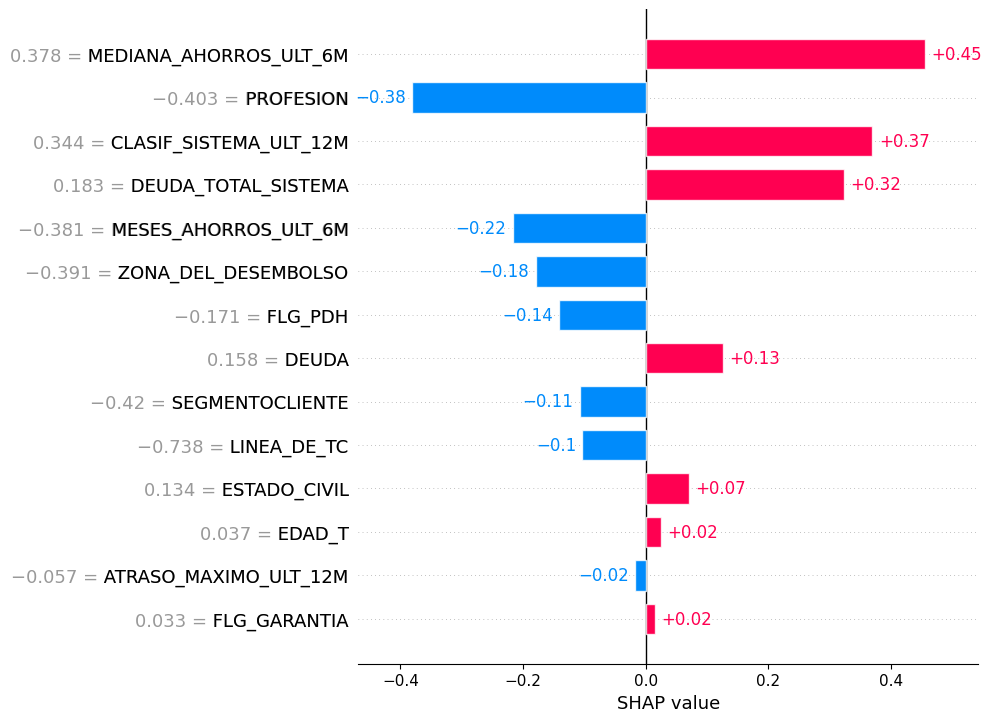

In [197]:
shap.plots.bar(shap_values_bin[0],max_display=30)

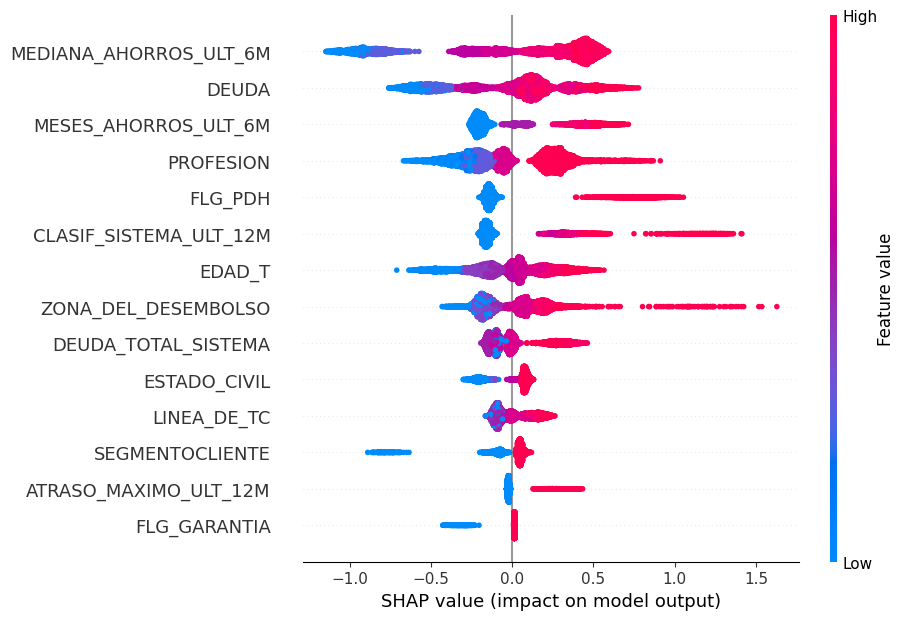

In [198]:
# Este tipo de gráfico evalua todo el conjunto
shap.plots.beeswarm(shap_values_bin, max_display=30)

## **10. Pickling y Unpickling el Modelo y del Pipeline del Feature Engineering**

In [ ]:
import pickle

In [ ]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pickle','wb') as fe_data_file:
     pickle.dump(pipe_5,fe_data_file)

In [ ]:
# Empaquetamos el modelo obtenido
with open('final_model.pickle','wb') as modelFile:
     pickle.dump(gbc,modelFile)

In [ ]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [ ]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

In [ ]:
#Probemos el pipeline
X_train_t_p=fe_final.transform(X_train)
X_test_t_p=fe_final.transform(X_test)

In [ ]:
X_train_t2_p=pd.concat([X_train_t_p[cat_cols_3], X_train_t_p[num_cols_3]], axis=1)
X_test_t2_p=pd.concat([X_test_t_p[cat_cols_3], X_test_t_p[num_cols_3]], axis=1)

In [ ]:
# Probemos el modelo
pred_train_prueba = modelo_final.predict_proba(X_train_t2_p)
pred_test_prueba = modelo_final.predict_proba(X_test_t2_p)
print('GBC Train Prueba roc-auc: {}'.format(roc_auc_score(y_train, pred_train_prueba[:,1])))
print('GBC Test Prueba roc-auc: {}'.format(roc_auc_score(y_test, pred_test_prueba[:,1])))

In [ ]:
#pd.concat([X_test,y_test],axis=1).to_csv('Base_SolicitudesCreditoEfectivo_Test.csv', index = False)